## <font color='red'> Nearest Earth Objects. </font>

#### In this problem we need to see if we can predict if a asteroid is dangerous for the earth or not, we have a large database that contains 90836 values and 10 columns, here we will use the database "neo.csv" that was made available to use, below you will see an analysis of the data, the processing of this data, balancing classes and the use of Classifications models of machine learning to achieve our goal.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#### **Importing Libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier

## <font color='blue'> 1. Importing Dataset. </font>

#### Here we are reading the database using the name "df" in the variable.

In [4]:
df = pd.read_csv('C:/Users/balu9/OneDrive/Desktop/neo.csv', sep = ',')

#### After using the head function, we can see that this database has not null values (using the info function we can confirm this), our target variable is "hazardous", we can also see that we have Numerical and Categoricals

#### Categorical Variables
##### orbiting_body, sentry_object and hazardous

#### Continuous Variables
##### est_diameter_min, est_diameter_max, relative_velocity, miss_distance and absolute_magnitude

In [5]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [6]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [8]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [9]:
df.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

# <font color='blue'> 2. Data Analysis.</font>

#### **Verifying the correlation between our variables.**

#### Verifying the correlation between our variables, here we can see that we have a strong correlation between the variables est_diameter_min and est_diameter_max.

<AxesSubplot:>

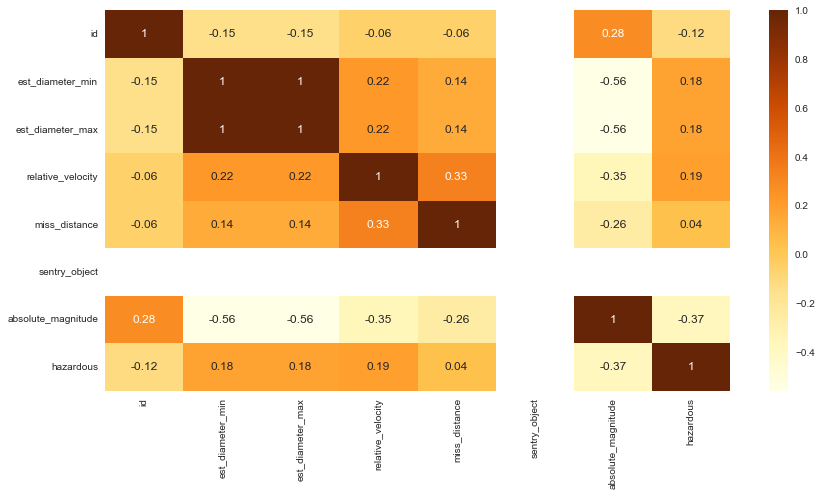

In [10]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

### "Categorical Variables"

#### Here we can see that we have only one value in the variables Orbiting_Body and Sentry_Object, always it will be Earth or False, When we start looking at our target variable, we can see that we have fewer asteroids we need to worry about compared to the ones we don't.

<AxesSubplot:xlabel='hazardous', ylabel='count'>

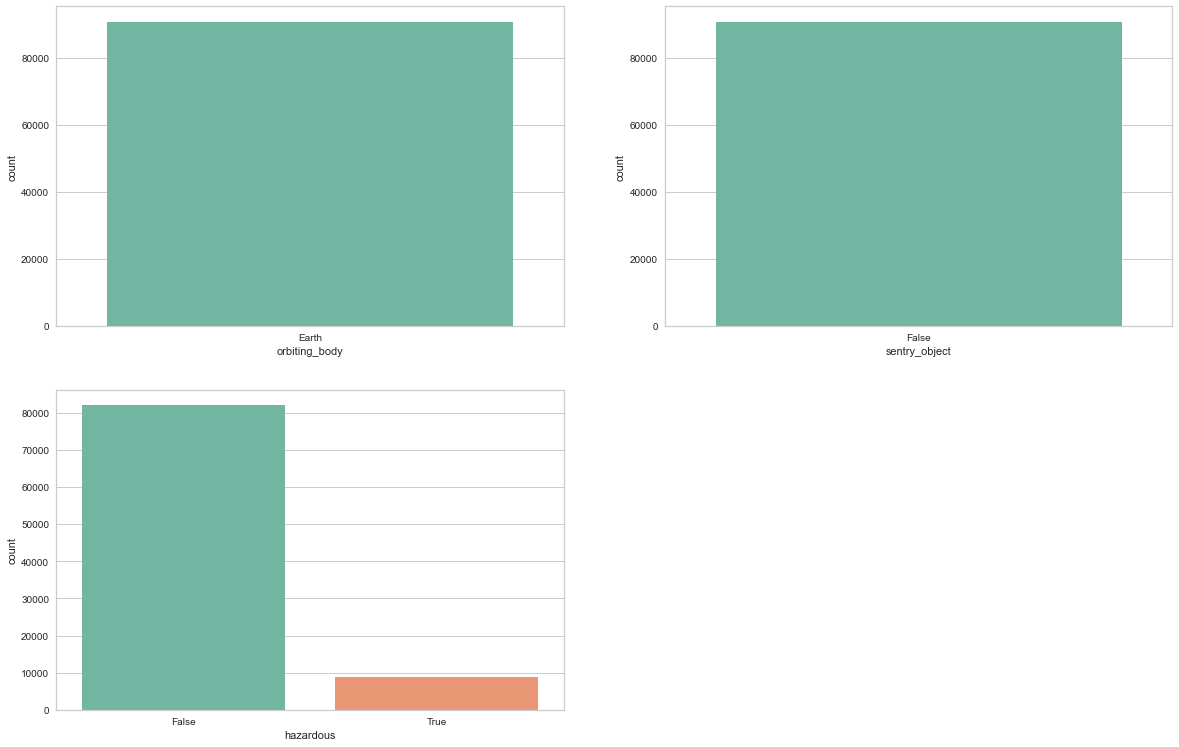

In [11]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'orbiting_body', palette='Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'sentry_object', palette='Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'hazardous', palette='Set2', data = df)

In [12]:
df['orbiting_body'].value_counts()

Earth    90836
Name: orbiting_body, dtype: int64

In [13]:
df['sentry_object'].value_counts()

False    90836
Name: sentry_object, dtype: int64

In [14]:
df['hazardous'].value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

### Continuous Variables

#### Est_diameter_min - Minimum Estimated Diameter in Kilometres
##### - We can see that most of the data has a diameter between 0 and 5.

#### Est_diameter_max - Maximum Estimated Diameter in Kilometres
##### - We can see that most of the data has a diameter between 0 and 5.

#### Relative_velocity - Velocity Relative to Earth
##### - We can see that we have a concentration between 40000-50000.

#### Miss_distance - Distance in Kilometres missed
##### - Here the data is well distributed.

#### Absolute_magnitude - Describes intrinsic luminosity
##### - Here we can see that most of the data is between 20-38 but we have a large concentration between 25-28.

C:\Users\balu9\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='absolute_magnitude'>

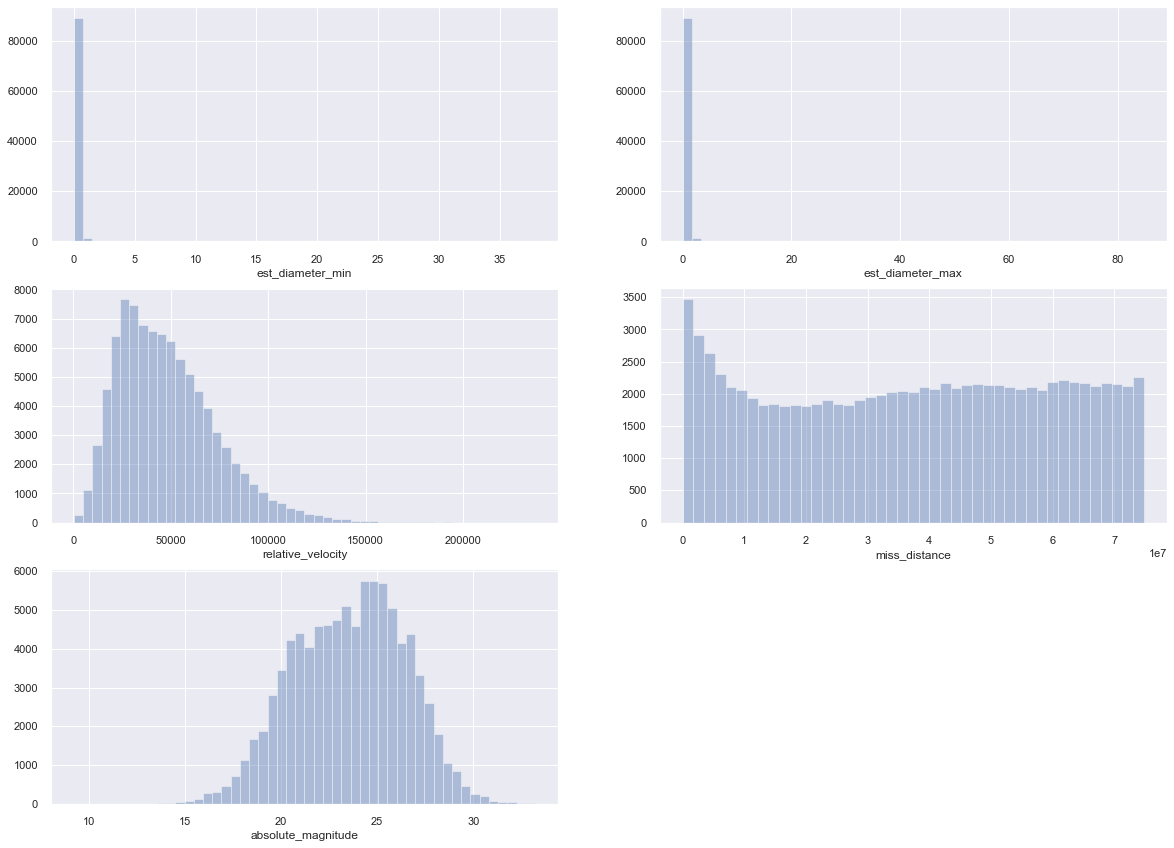

In [15]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(5,2,1)
sns.distplot(df.est_diameter_min, kde = False)

plt.subplot(5,2,2)
sns.distplot(df.est_diameter_max, kde = False)

plt.subplot(5,2,3)
sns.distplot(df.relative_velocity, kde = False)

plt.subplot(5,2,4)
sns.distplot(df.miss_distance, kde = False)

plt.subplot(5,2,5)
sns.distplot(df.absolute_magnitude, kde = False)

### Bivariate Analysis

#### When we compare our variable target with others Continuous variables, we can see some insights:

#### Most dangerous asteroids do not have a large diameter, the Relative Velocity starts at almost 20000 and the most important feeling we can see here is the Absolute Magnitude, most of the dangerous asteroids have the value of the variable Absolute Magnitude between 18-23.

#### When we compare the variable Absolute Magnitude which others Continuous Variables we can see that most part of the Dangerous Asteroids have the variable Absolute Magnitude between 18-23, Miss Distance Between 0-2 and the Relative Velocity between 50000 and 200000.

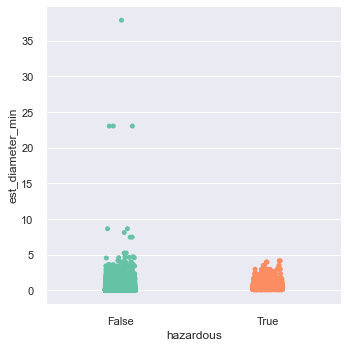

In [16]:
sns.catplot(x = "hazardous", y = "est_diameter_min", palette = "Set2", data = df)

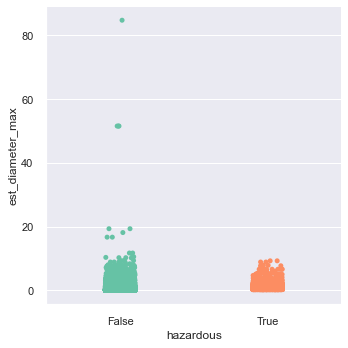

In [17]:
sns.catplot(x = "hazardous", y = "est_diameter_max", palette = "Set2", data = df)

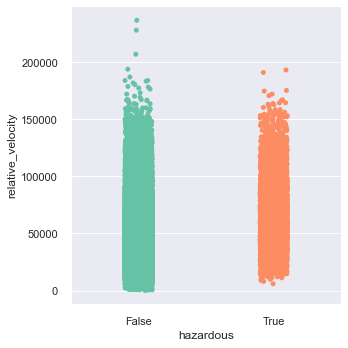

In [18]:
sns.catplot(x = "hazardous", y = "relative_velocity", palette = "Set2", data = df)

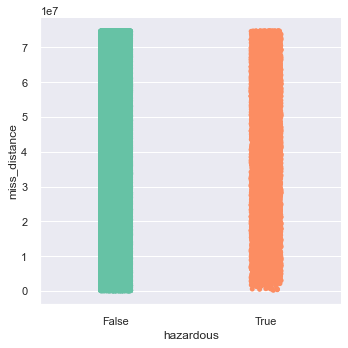

In [19]:
sns.catplot(x = "hazardous", y = "miss_distance", palette = "Set2", data = df)

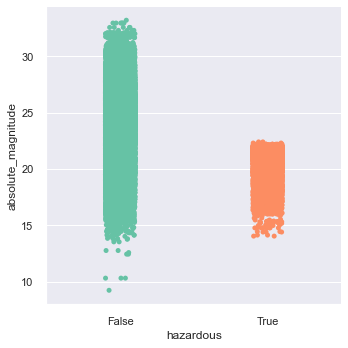

In [20]:
sns.catplot(x = "hazardous", y = "absolute_magnitude", palette = "Set2", data = df)

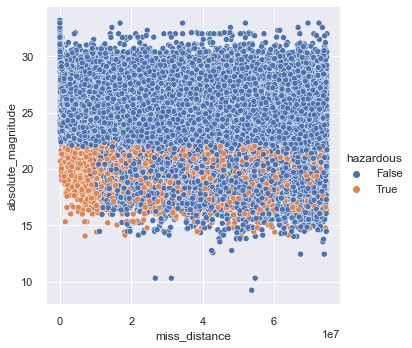

In [21]:
sns.relplot(x='miss_distance', y = 'absolute_magnitude', hue = "hazardous", data = df)

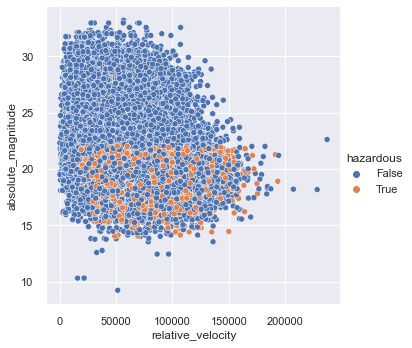

In [22]:
sns.relplot(x='relative_velocity', y = 'absolute_magnitude', hue = "hazardous", data = df)

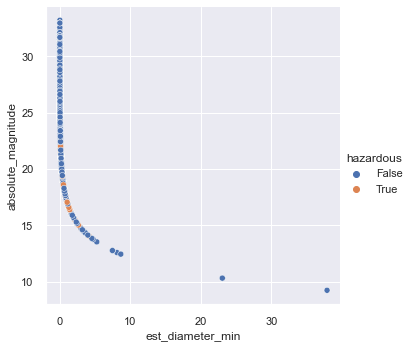

In [23]:
sns.relplot(x='est_diameter_min', y = 'absolute_magnitude', hue = "hazardous", data = df)

## <font color='blue'> 3. Model Building. </font>

#### Here we will drop the Variables that we dont need to use in our models.

In [24]:
df = df.drop('id', 1)
df = df.drop('name', 1)
df = df.drop('est_diameter_min', 1)
df = df.drop('orbiting_body', 1)
df = df.drop('sentry_object', 1)

C:\Users\balu9\AppData\Local\Temp\ipykernel_23896\3847027505.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('id', 1)
C:\Users\balu9\AppData\Local\Temp\ipykernel_23896\3847027505.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('name', 1)
C:\Users\balu9\AppData\Local\Temp\ipykernel_23896\3847027505.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('est_diameter_min', 1)
C:\Users\balu9\AppData\Local\Temp\ipykernel_23896\3847027505.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('orbiting_body', 1)
C:\Users\balu9\AppData\Local\Temp\ipykernel_23896\3847027505.py:5: FutureWarning:

#### Separating into features variables and target variable.

In [25]:
X = df.iloc[:, 0:4].values

In [26]:
y = df.iloc[:, 4].values

#### Label Encoder

#### Using LabelEncoder to transform categorical variables into continuous variables.

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
label_encoder_hazardous = LabelEncoder()

In [29]:
y = label_encoder_hazardous.fit_transform(y)

#### We will run the models before scaling the data, after we will back here to run the StandardScaler and MinMax Scaler and verify if we have best results using the scaling.

#### StandardScaler

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [31]:
X_standard[0]

array([ 3.58728394, -1.36391312,  0.79515317, -2.34863167])

#### MinMaxScaler

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
obj_norm = MinMaxScaler().fit(X)

In [34]:
X_normalization = obj_norm.transform(X)

In [35]:
X_normalization[0]

array([0.03160722, 0.056447  , 0.73314081, 0.31289111])

### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [38]:
X_train.shape, y_train.shape

((63585, 4), (63585,))

In [39]:
X_test.shape, y_test.shape

((27251, 4), (27251,))

### Naive Bayes

#### Here we will use the Naive Bayes Model, we will test Gaussian model, using our Normal Data, StandardScaler Data and MinMax Data.

#### Running Gaussian Model.

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [42]:
previsoes = naive_bayes.predict(X_test)

In [43]:
confusao = confusion_matrix(y_test, previsoes)

#### Normal Data

0.8971780852078822

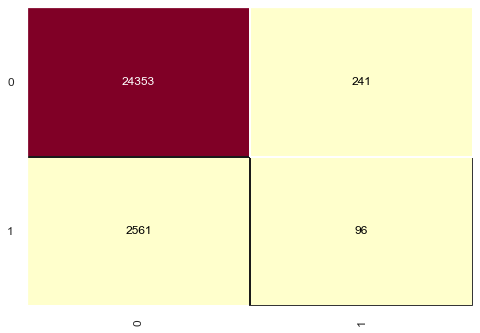

In [44]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [45]:
classification_naive_gaussian = (classification_report(y_test, previsoes))

In [46]:
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     24594
           1       0.28      0.04      0.06      2657

    accuracy                           0.90     27251
   macro avg       0.59      0.51      0.50     27251
weighted avg       0.84      0.90      0.86     27251



#### Result Using the Normal Data, here we have 89,71% Accuracy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous.

In [47]:
score_naive_gaussian = 0.8971780852078822

#### StandardScaler

0.8971780852078822

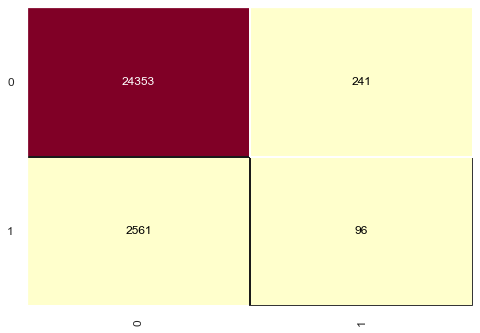

In [48]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [49]:
classification_naive_gaussian_standard = classification_report(y_test, previsoes)

In [50]:
print(classification_naive_gaussian_standard)

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     24594
           1       0.28      0.04      0.06      2657

    accuracy                           0.90     27251
   macro avg       0.59      0.51      0.50     27251
weighted avg       0.84      0.90      0.86     27251



#### Result Using the Standard Scaler Data, here we have 86,19% Accuracy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous, if we compare the accuracy, using the normal data is a little worse, but it's not a good model.

In [51]:
score_naive_gaussian_scaler = 0.8619500201827456

#### MinMax Scaler

0.8971780852078822

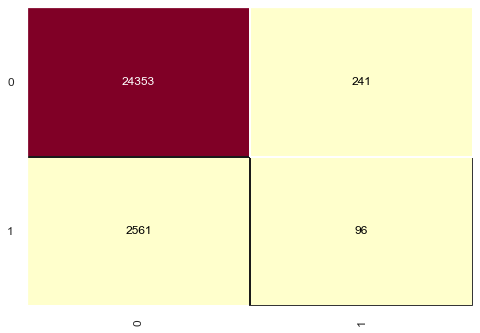

In [52]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [53]:
classification_naive_gaussian_minmax = classification_report(y_test, previsoes)

In [54]:
print(classification_naive_gaussian_minmax)

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     24594
           1       0.28      0.04      0.06      2657

    accuracy                           0.90     27251
   macro avg       0.59      0.51      0.50     27251
weighted avg       0.84      0.90      0.86     27251



#### Result Using the MinMax Scaler Data, here we have 86,19% Accuracy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous, if we compare the accuracy, using the normal data is a little worse, when we compare with StandardScaler we have the same result, but it's not a good model.

In [55]:
score_naive_gaussian_minmax = 0.8619500201827456

### Decision Tree

#### Here we will use the Decision Tree Model, we will test Entropy and Gini calculations, using our Normal Data, StandardScaler Data and MinMax Data.

####  Running Entropy Calculation.

In [56]:
arvore_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3, random_state=0)

In [57]:
arvore_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [58]:
previsoes = arvore_entropy.predict(X_test)

#### Here we can see the tree and the decision rules.

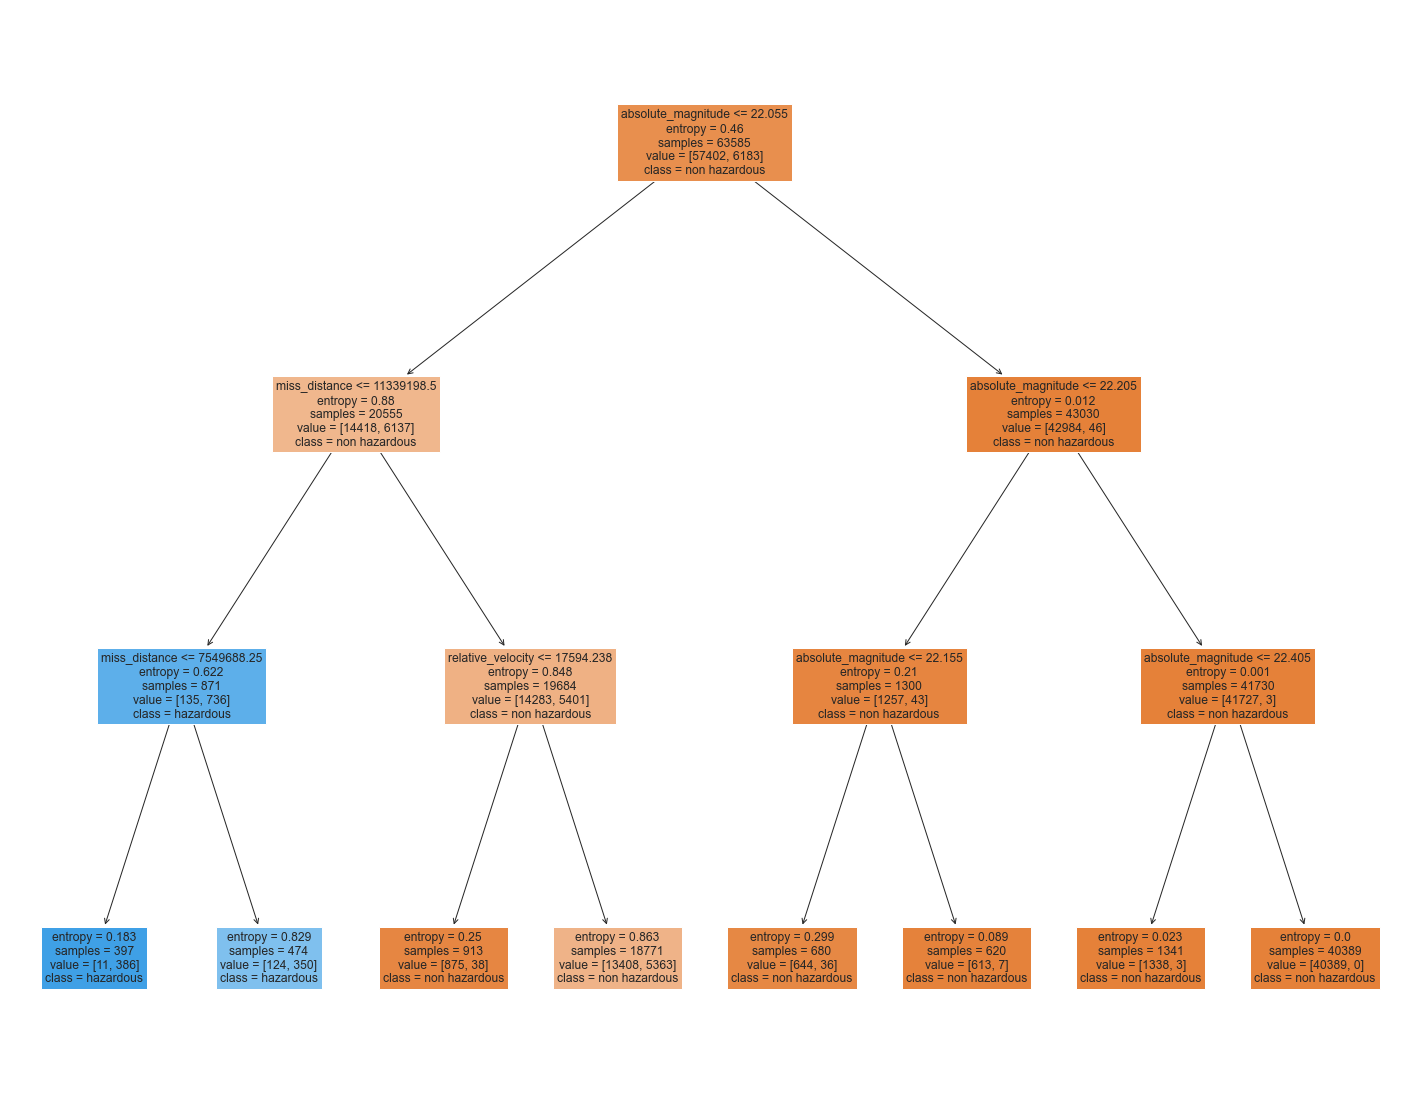

In [59]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arvore_entropy, feature_names=df.columns[:-1], class_names=['non hazardous', 'hazardous'], filled=True);

#### Normal Data

0.9130674103702616

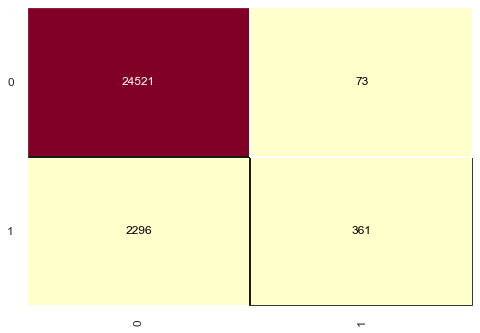

In [60]:
cm = ConfusionMatrix(arvore_entropy)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [61]:
classification_decision_entropy = (classification_report(y_test, previsoes))

In [62]:
print(classification_decision_entropy)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24594
           1       0.83      0.14      0.23      2657

    accuracy                           0.91     27251
   macro avg       0.87      0.57      0.59     27251
weighted avg       0.91      0.91      0.88     27251



#### Result Using the Normal Data, here we have 91,30% Accuracy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous.

In [63]:
score_tree_entropy = 0.9130674103702616

#### StandardScaler 

0.9130674103702616

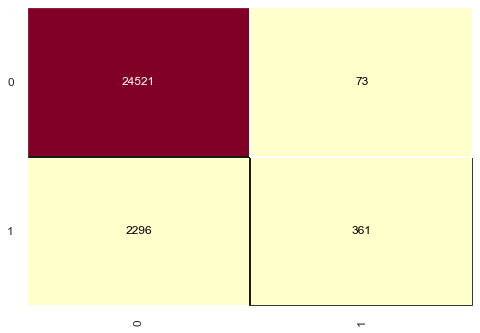

In [64]:
cm = ConfusionMatrix(arvore_entropy)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [65]:
classification_decision_entropy_standard = (classification_report(y_test, previsoes))

In [66]:
print(classification_decision_entropy_standard)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24594
           1       0.83      0.14      0.23      2657

    accuracy                           0.91     27251
   macro avg       0.87      0.57      0.59     27251
weighted avg       0.91      0.91      0.88     27251



#### Result Using the Standard Scaler Data, here we have 91,30% Accuracy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous, if we compare the accuracy, its the same result using the normal data, but it's not a good model.

In [67]:
score_tree_entropy_scaler = 0.9130674103702616

#### MinMax Scaler

0.9130674103702616

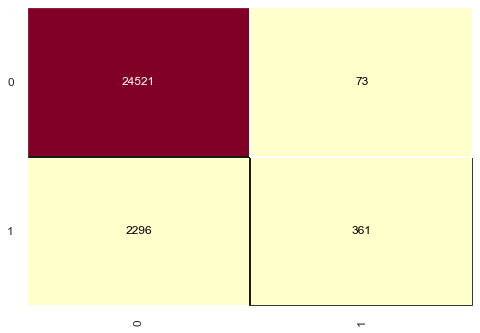

In [68]:
cm = ConfusionMatrix(arvore_entropy)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [69]:
classification_decision_entropy_minmax = (classification_report(y_test, previsoes))

In [70]:
print(classification_decision_entropy_minmax)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24594
           1       0.83      0.14      0.23      2657

    accuracy                           0.91     27251
   macro avg       0.87      0.57      0.59     27251
weighted avg       0.91      0.91      0.88     27251



#### Result Using the MinMax Scaler Data, here we have 90,24% Accuracy, but the model only learned how predict it's not a dangerous asteroid than when its a dangerous.

In [71]:
score_tree_entropy_minmax = 0.9024989908627207

#### Checking the most important variables of the model

In [72]:
columns = df.iloc[:, 0:4].columns

In [73]:
feature_imp = pd.Series(arvore_entropy.feature_importances_, index = columns).sort_values(ascending = False)

#### Seeing the most important variable using this model, we can see that it uses the variable "absolute_magnitude" to make a decision about be hazardous or don't be.

In [74]:
feature_imp

absolute_magnitude    0.901980
miss_distance         0.076783
relative_velocity     0.021237
est_diameter_max      0.000000
dtype: float64

#### Running Gini Calculation.

In [75]:
arvore_gini = DecisionTreeClassifier(max_depth= 3, random_state=0)

In [76]:
arvore_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [77]:
previsoes = arvore_gini.predict(X_test)

#### Here we can see the tree and the decision rules.

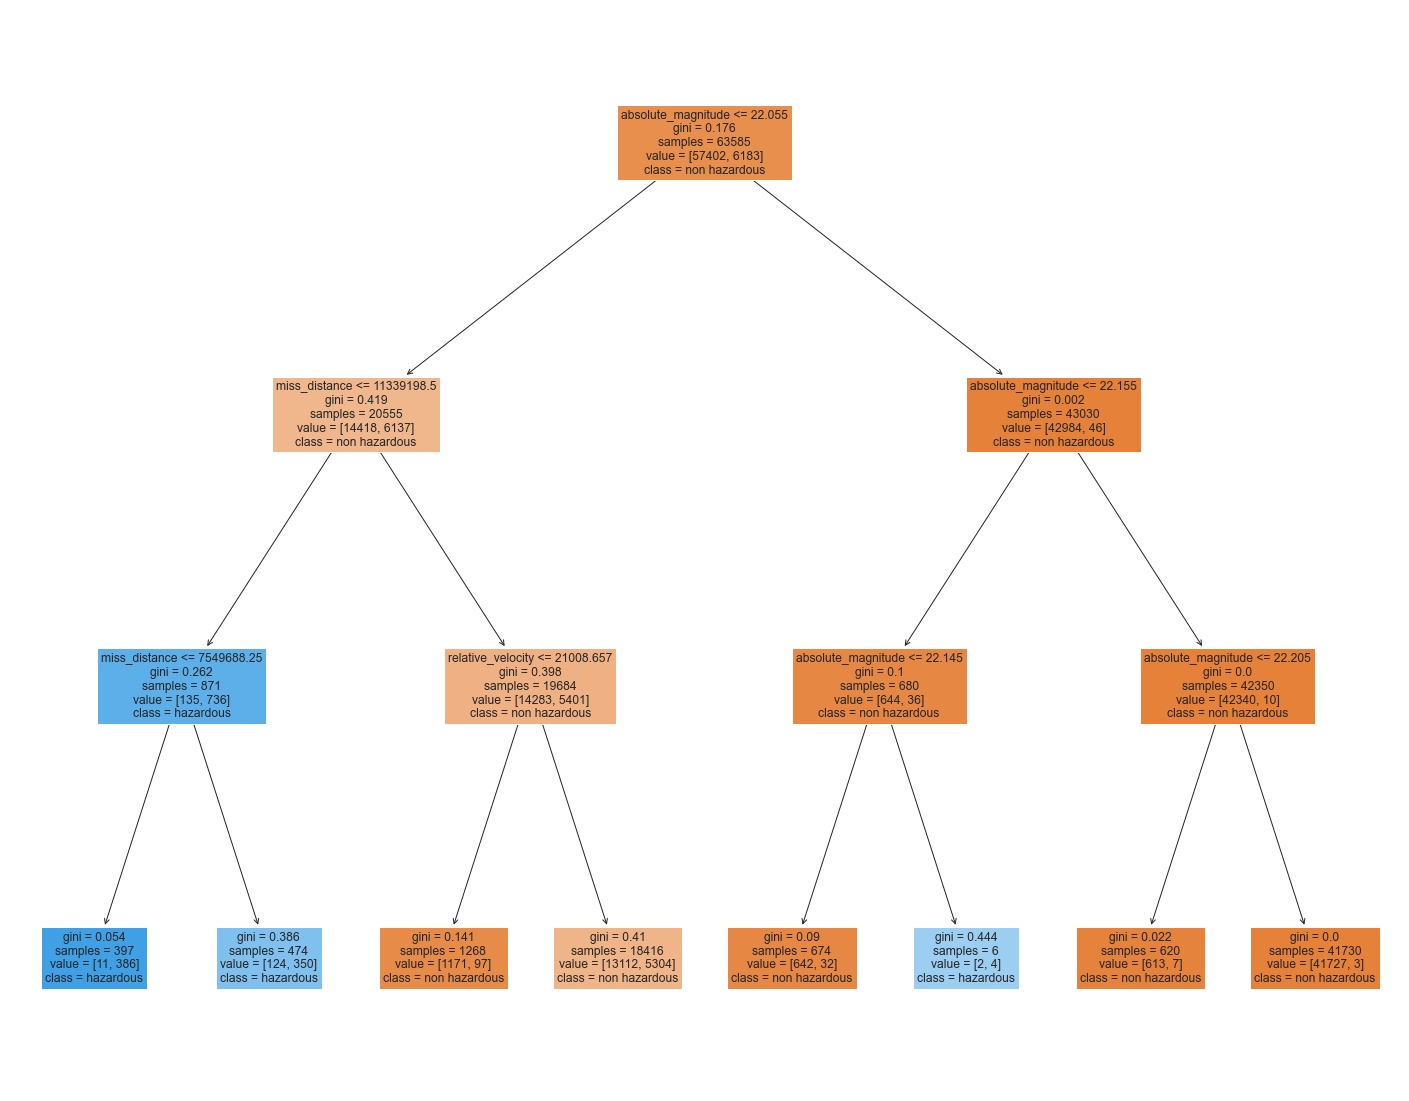

In [78]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arvore_gini, feature_names=df.columns[:-1], class_names=['non hazardous', 'hazardous'], filled=True);

#### Normal Data

0.9132141939745331

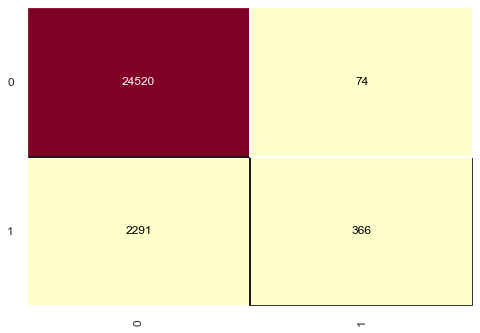

In [79]:
cm = ConfusionMatrix(arvore_gini)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [80]:
classification_decision_gini = (classification_report(y_test, previsoes))

In [81]:
print(classification_decision_gini)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24594
           1       0.83      0.14      0.24      2657

    accuracy                           0.91     27251
   macro avg       0.87      0.57      0.60     27251
weighted avg       0.91      0.91      0.88     27251



#### Result Using the Normal Data, here we have 91,32% Accuracy a little more than using Entropy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous.

In [82]:
score_tree_gini = 0.9132141939745331

#### StandardScaler

0.9132141939745331

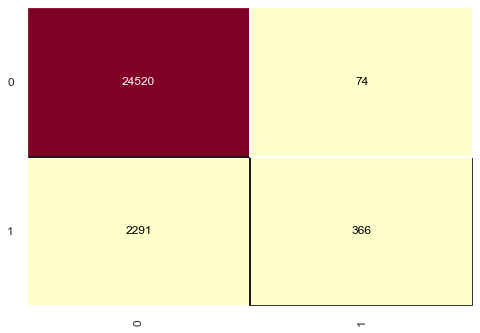

In [83]:
cm = ConfusionMatrix(arvore_gini)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [84]:
classification_decision_gini_scaler = (classification_report(y_test, previsoes))

In [85]:
print(classification_decision_gini_scaler)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24594
           1       0.83      0.14      0.24      2657

    accuracy                           0.91     27251
   macro avg       0.87      0.57      0.60     27251
weighted avg       0.91      0.91      0.88     27251



#### Result Using the Standard Scaler Data, here we have 91,32% Accuracy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous, if we compare the accuracy using the normal data we have the same result, when we compare when we use Entropy, it a little better, but it's not a good model.

In [86]:
score_tree_gini_scaler = 0.9132141939745331

#### MinMax Scaler

0.9132141939745331

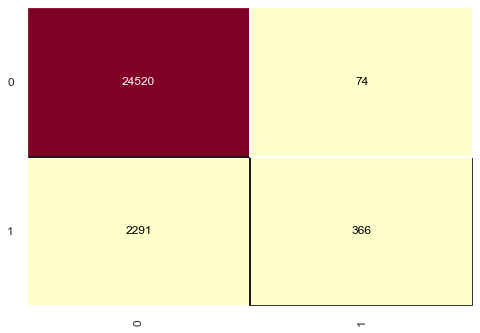

In [87]:
cm = ConfusionMatrix(arvore_gini)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [88]:
classification_decision_gini_minmax = (classification_report(y_test, previsoes))

In [89]:
print(classification_decision_gini_minmax)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24594
           1       0.83      0.14      0.24      2657

    accuracy                           0.91     27251
   macro avg       0.87      0.57      0.60     27251
weighted avg       0.91      0.91      0.88     27251



#### Result Using the MinMax Scaler Data, here we have 91,32% Accuracy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous, if we compare the accuracy, we have the same result when we use Normal Data and Standard Scaler.

In [90]:
score_tree_gini_minmax = 0.9132141939745331

#### Checking the most important variables of the model

In [91]:
feature_imp = pd.Series(arvore_gini.feature_importances_, index = columns).sort_values(ascending = False)

#### Seeing the most important variable using this model, we can see that it uses the variable "absolute_magnitude" to make a decision about be hazardous or don't be, it's less than when we use the Entropy model, but even so, is the most important variable, here we can see that the variable Miss_Distance is more relevant.

In [92]:
feature_imp

absolute_magnitude    0.785928
miss_distance         0.180307
relative_velocity     0.033766
est_diameter_max      0.000000
dtype: float64

### Random Forest

#### Here we will use the Random Forest Model, we will test Entropy and Gini calculations, using our Normal Data, StandardScaler Data and MinMax Data.

#### Running Entropy Calculation.

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
random_forest = RandomForestClassifier(n_estimators = 100, max_depth= 3, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=0)

In [95]:
previsoes = random_forest.predict(X_test)

#### Normal Data

0.9131408021723973

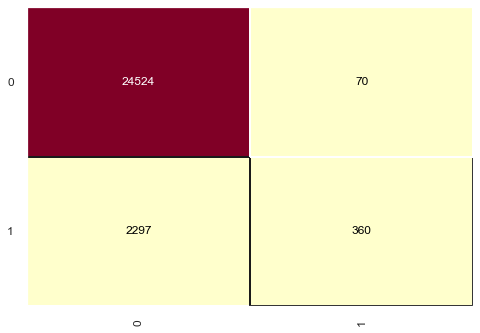

In [96]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [97]:
classification_random_entropy = (classification_report(y_test, previsoes))

In [98]:
print(classification_random_entropy)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24594
           1       0.84      0.14      0.23      2657

    accuracy                           0.91     27251
   macro avg       0.88      0.57      0.59     27251
weighted avg       0.91      0.91      0.88     27251



#### Result Using the Normal Data, here we have 91,31% Accuracy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous, one problem here is that the model learning about not dangerous asteroid and can barely hit anything when an asteroid is dangerous.

In [99]:
score_random_entropy = 0.9131408021723973

#### StandardScaler 

0.9131408021723973

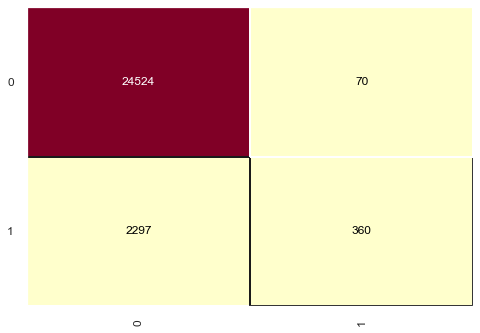

In [100]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [101]:
classification_random_entropy_scaler = (classification_report(y_test, previsoes))

In [102]:
print(classification_random_entropy_scaler)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24594
           1       0.84      0.14      0.23      2657

    accuracy                           0.91     27251
   macro avg       0.88      0.57      0.59     27251
weighted avg       0.91      0.91      0.88     27251



#### Result Using the StandardScaler Data, here we have 91,31% Accuracy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous, one problem here is that the model learning about not dangerous asteroid and can barely hit anything when an asteroid is dangerous, comparing with the Normal Data, we have the same result.

In [103]:
score_random_entropy_scaler = 0.9131408021723973

#### MinMax Scaler

0.9131408021723973

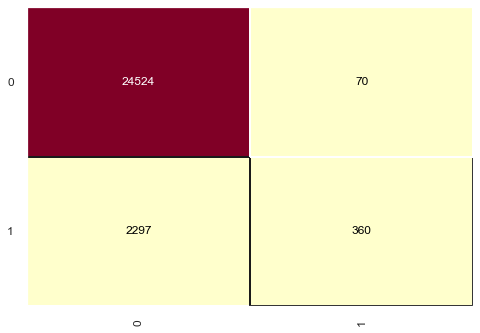

In [104]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [105]:
classification_random_entropy_minmax = (classification_report(y_test, previsoes))

In [106]:
print(classification_random_entropy_minmax)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24594
           1       0.84      0.14      0.23      2657

    accuracy                           0.91     27251
   macro avg       0.88      0.57      0.59     27251
weighted avg       0.91      0.91      0.88     27251



#### Result Using the MinMax Scaler Data, here we have 91,31% Accuracy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous, one problem here is that the model learning about not dangerous asteroid and can barely hit anything when an asteroid is dangerous, comparing with the Normal and StandardScaler Data, we have the same result.

In [107]:
score_random_entropy_minmax = 0.9131408021723973

##### Checking the most important variables of the model

In [108]:
feature_imp = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)

#### it's interesting to see this view, comparing with Decision Tree, here using Random Forest model we can see that we have two similar variables in importance value, both absolute_magnitude and est_diameter_max variables are important for the model.

In [109]:
feature_imp

absolute_magnitude    0.487881
est_diameter_max      0.426432
miss_distance         0.051466
relative_velocity     0.034222
dtype: float64

#### Gini 

In [110]:
random_forest = RandomForestClassifier(n_estimators = 100, max_depth= 3, random_state = 0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [111]:
previsoes = random_forest.predict(X_test)

#### Normal Data

0.9132508898756009

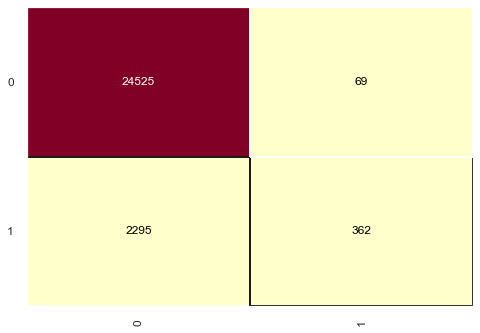

In [112]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [113]:
classification_random_gini = (classification_report(y_test, previsoes))

In [114]:
print(classification_random_gini)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24594
           1       0.84      0.14      0.23      2657

    accuracy                           0.91     27251
   macro avg       0.88      0.57      0.59     27251
weighted avg       0.91      0.91      0.88     27251



#### Result Using the Normal Data, here we have 91,32% Accuracy, a little less than using Entropy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous, and we have the same problem here, the model learning about not dangerous asteroid and can barely hit anything when an asteroid is dangerous.

In [115]:
score_random_gini = 0.9132508898756009

#### StandardScaler 

0.9132508898756009

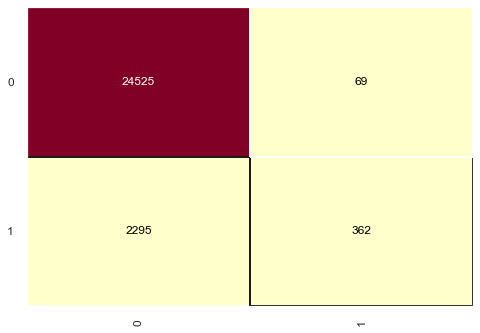

In [116]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [117]:
classification_random_gini_scaler = (classification_report(y_test, previsoes))

In [118]:
print(classification_random_gini_scaler)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24594
           1       0.84      0.14      0.23      2657

    accuracy                           0.91     27251
   macro avg       0.88      0.57      0.59     27251
weighted avg       0.91      0.91      0.88     27251



#### Result Using the StandardScaler Data, here we have 91,32% Accuracy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous, one problem here is that the model learning about not dangerous asteroid and can barely hit anything when an asteroid is dangerous, comparing with the Normal Data, we have the same result.

In [119]:
score_random_gini_scaler = 0.9132508898756009

#### MinMax Scaler

0.9132508898756009

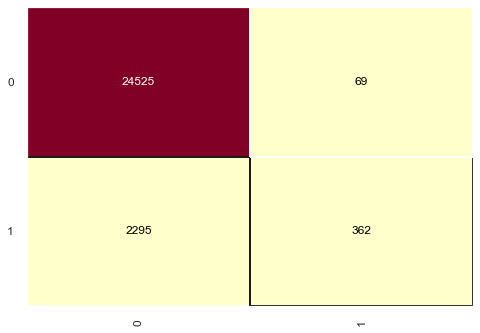

In [120]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [121]:
classification_random_gini_minmax = (classification_report(y_test, previsoes))

In [122]:
print(classification_random_gini_minmax)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24594
           1       0.84      0.14      0.23      2657

    accuracy                           0.91     27251
   macro avg       0.88      0.57      0.59     27251
weighted avg       0.91      0.91      0.88     27251



#### Result Using the MinMax Scaler Data, here we have 91,31% Accuracy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous, if we compare the accuracy, we have a little worse result when we use Normal Data and Standard Scaler.

In [123]:
score_random_gini_minmax = 0.9131408021723973

### KNN

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

In [126]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [127]:
previsoes = knn.predict(X_test)

#### Normal Data

0.8794172690910426

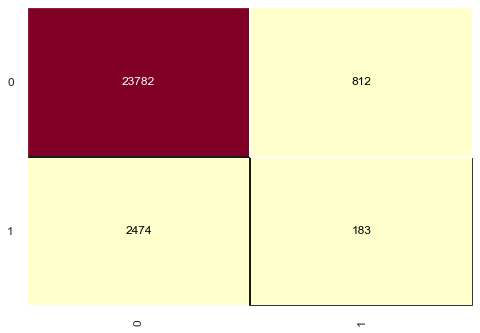

In [128]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [129]:
classification_knn = (classification_report(y_test, previsoes))

In [130]:
print(classification_knn)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     24594
           1       0.18      0.07      0.10      2657

    accuracy                           0.88     27251
   macro avg       0.54      0.52      0.52     27251
weighted avg       0.84      0.88      0.85     27251



#### Result Using the Normal Data, here we have 87,94% Accuracy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous.

In [131]:
score_knn = 0.8794172690910426

#### StandardScaler

0.8794172690910426

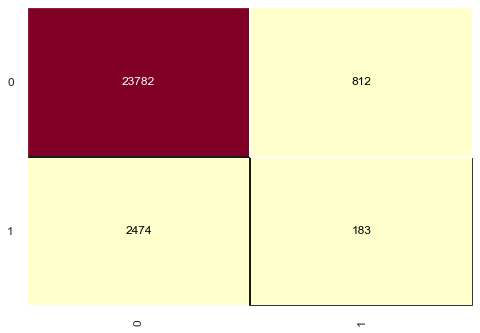

In [132]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [133]:
classification_knn_scaler = (classification_report(y_test, previsoes))

In [134]:
print(classification_knn_scaler)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     24594
           1       0.18      0.07      0.10      2657

    accuracy                           0.88     27251
   macro avg       0.54      0.52      0.52     27251
weighted avg       0.84      0.88      0.85     27251



#### Result Using the StandardScaler Data, here we have 89,63% Accuracy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous, its a little better comparing when we use the Normal Data.

In [135]:
score_knn_scaler = 0.8963340794833217

#### MinMax Scaler

0.8794172690910426

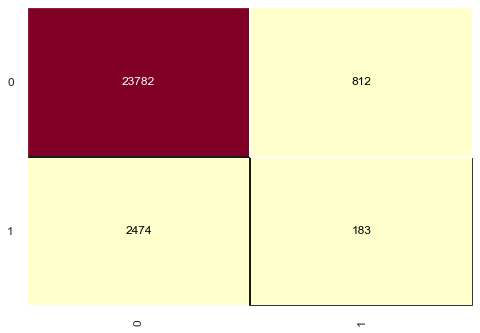

In [136]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [137]:
classification_knn_MinMax = (classification_report(y_test, previsoes))

In [138]:
print(classification_knn_MinMax)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     24594
           1       0.18      0.07      0.10      2657

    accuracy                           0.88     27251
   macro avg       0.54      0.52      0.52     27251
weighted avg       0.84      0.88      0.85     27251



#### Result Using the MinMax Scaler Data, here we have 89,62% Accuracy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous, its a little better comparing when we use the Normal Data but its worse when comparing with StandardScaler Data.

In [139]:
score_knn_minmax = 0.895269898352354

### Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
logistic = LogisticRegression(random_state = 1)

In [142]:
logistic.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [143]:
previsoes = logistic.predict(X_test)

#### Normal Data 

0.9024989908627207

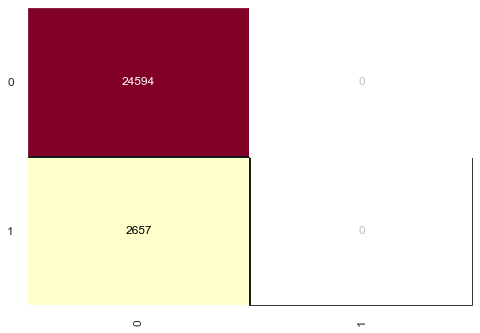

In [144]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [145]:
logistic_normal = classification_report(y_test, previsoes)

C:\Users\balu9\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\balu9\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\balu9\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     24594
           1       0.00      0.00      0.00      2657

    accuracy                           0.90     27251
   macro avg       0.45      0.50      0.47     27251
weighted avg       0.81      0.90      0.86     27251



#### Result Using the Normal Data, here we have 90,24% Accuracy, a little less than using Entropy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous, and we have the same problem here, the model learning about not dangerous asteroid and can barely hit anything when an asteroid is dangerous.

In [147]:
score_logistic = 0.9024989908627207

#### StandardScaler

0.9024989908627207

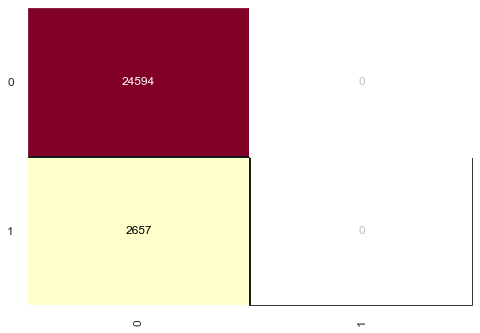

In [148]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [149]:
logistic_scaler = classification_report(y_test, previsoes)

C:\Users\balu9\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\balu9\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\balu9\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [150]:
print(logistic_scaler)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     24594
           1       0.00      0.00      0.00      2657

    accuracy                           0.90     27251
   macro avg       0.45      0.50      0.47     27251
weighted avg       0.81      0.90      0.86     27251



#### Result Using the StandardScaler Data, here we have 90,18% Accuracy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous, the model really learning when the asteroid is not dangeorus, but he fail when he need to predict if the asteroid is dangerous.

In [151]:
logistic_standard = 0.9018017687424315

#### MinMax Scaler

0.9024989908627207

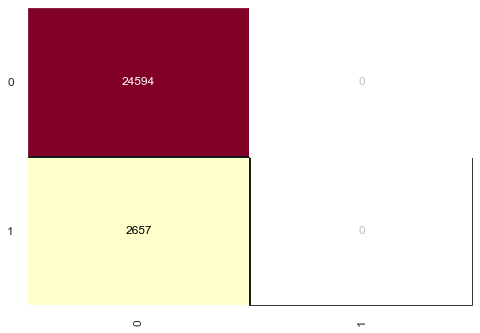

In [152]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [153]:
logistic_minmax = classification_report(y_test, previsoes)

C:\Users\balu9\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\balu9\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\balu9\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
print(logistic_minmax)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     24594
           1       0.00      0.00      0.00      2657

    accuracy                           0.90     27251
   macro avg       0.45      0.50      0.47     27251
weighted avg       0.81      0.90      0.86     27251



#### Result Using the MinMax Scaler Data, here we have 89,40% Accuracy, but the model is better at predicting when it's not a dangerous asteroid than when its a dangerous, the model really learning when the asteroid is not dangeorus, but he fail when he need to predict if the asteroid is dangerous, this model is worse than using StandardScaler and Normal Data.

In [155]:
logistic_minmax = 0.8940956295181828

### Conclusion - First Part

### After running the Machine Learning Models, we can see that we can get good accuracy on most models, but we only have models that are good at predicting when it's not a dangerous asteroid, and what we're trying to do is predict if the asteroid is dangerous, analyzing the data we can see that we have a lot more data with non-hazardous asteroid, so the models are learning more about this data than when the asteroid is dangerous, let's balance the classes and see what we can do with this data.

### Balancing Classes

#### Here we use the function NearMiss to balancing the classes, we are doing a undersampling and both target variable will have the same number of samples.

In [156]:
from imblearn.under_sampling import NearMiss

In [157]:
nr = NearMiss()

In [158]:
X, y = nr.fit_resample(X, y)

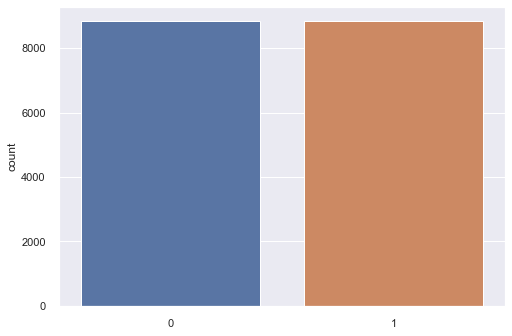

In [159]:
ax = sns.countplot(x=y)

#### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.|

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [161]:
X_train.shape, y_train.shape

((12376, 4), (12376,))

In [162]:
X_test.shape, y_test.shape

((5304, 4), (5304,))

### Naive Bayes

#### Here we will use the Naive Bayes Model, we will test Gaussian model, using our Normal Data, StandardScaler Data and MinMax Data.

#### Running Gaussian Model.

In [163]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [164]:
previsoes = naive_bayes.predict(X_test)

In [165]:
confusao = confusion_matrix(y_test, previsoes)

#### Normal Data

0.6165158371040724

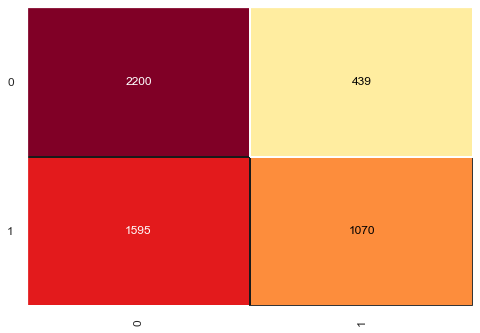

In [166]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [167]:
classification_naive_gaussian_balanced = (classification_report(y_test, previsoes))

In [168]:
print(classification_naive_gaussian_balanced)

              precision    recall  f1-score   support

           0       0.58      0.83      0.68      2639
           1       0.71      0.40      0.51      2665

    accuracy                           0.62      5304
   macro avg       0.64      0.62      0.60      5304
weighted avg       0.64      0.62      0.60      5304



#### Result Using the Normal Data, here we have 61,65% Accuracy, here we can see that our accuracy has decreased, but we can see that our model is better to preview when the asteroid is dangerous.

In [169]:
score_naive_gaussian_balanced = 0.6165158371040724

#### StandardScaler 

0.6165158371040724

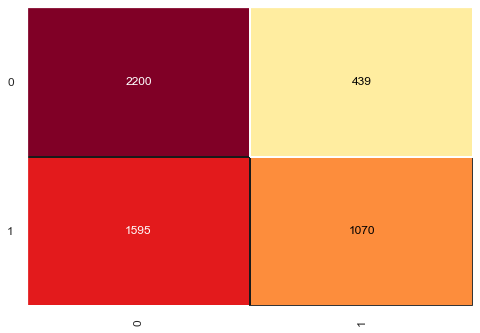

In [170]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [171]:
classification_naive_gaussian_balanced_standard = (classification_report(y_test, previsoes))

In [172]:
print(classification_naive_gaussian_balanced_standard)

              precision    recall  f1-score   support

           0       0.58      0.83      0.68      2639
           1       0.71      0.40      0.51      2665

    accuracy                           0.62      5304
   macro avg       0.64      0.62      0.60      5304
weighted avg       0.64      0.62      0.60      5304



#### Here the model is better than using Normal Data, we can see that our accuracy is really bad and we can see that our model our model is bad at predicting both outcomes, the accuracy of model is 63,59%

In [173]:
score_naive_gaussian_balanced_standard = 0.6359351432880844

#### MinMax Scaler

0.6165158371040724

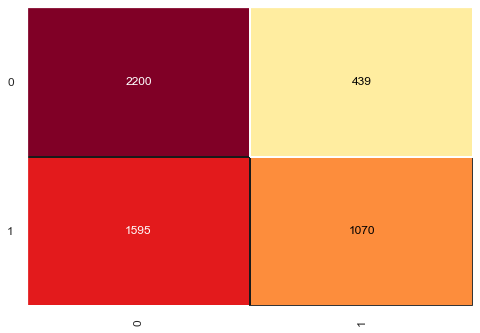

In [174]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [175]:
classification_naive_gaussian_balanced_minmax = (classification_report(y_test, previsoes))

In [176]:
print(classification_naive_gaussian_balanced_minmax)

              precision    recall  f1-score   support

           0       0.58      0.83      0.68      2639
           1       0.71      0.40      0.51      2665

    accuracy                           0.62      5304
   macro avg       0.64      0.62      0.60      5304
weighted avg       0.64      0.62      0.60      5304



#### Here the model is worse than using Normal and StandardScaler Data, we can see that our accuracy is really bad and we can see that our model our model is bad at predicting when the asteroid is dangerous, the accuracy of model is 60,93%

In [177]:
score_naive_gaussian_balanced_minmax = 0.6093514328808446

### Decision Tree

#### Entropy

In [178]:
arvore_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3, random_state=0)

In [179]:
arvore_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [180]:
previsoes = arvore_entropy.predict(X_test)

#### Here we can see the decision rules.

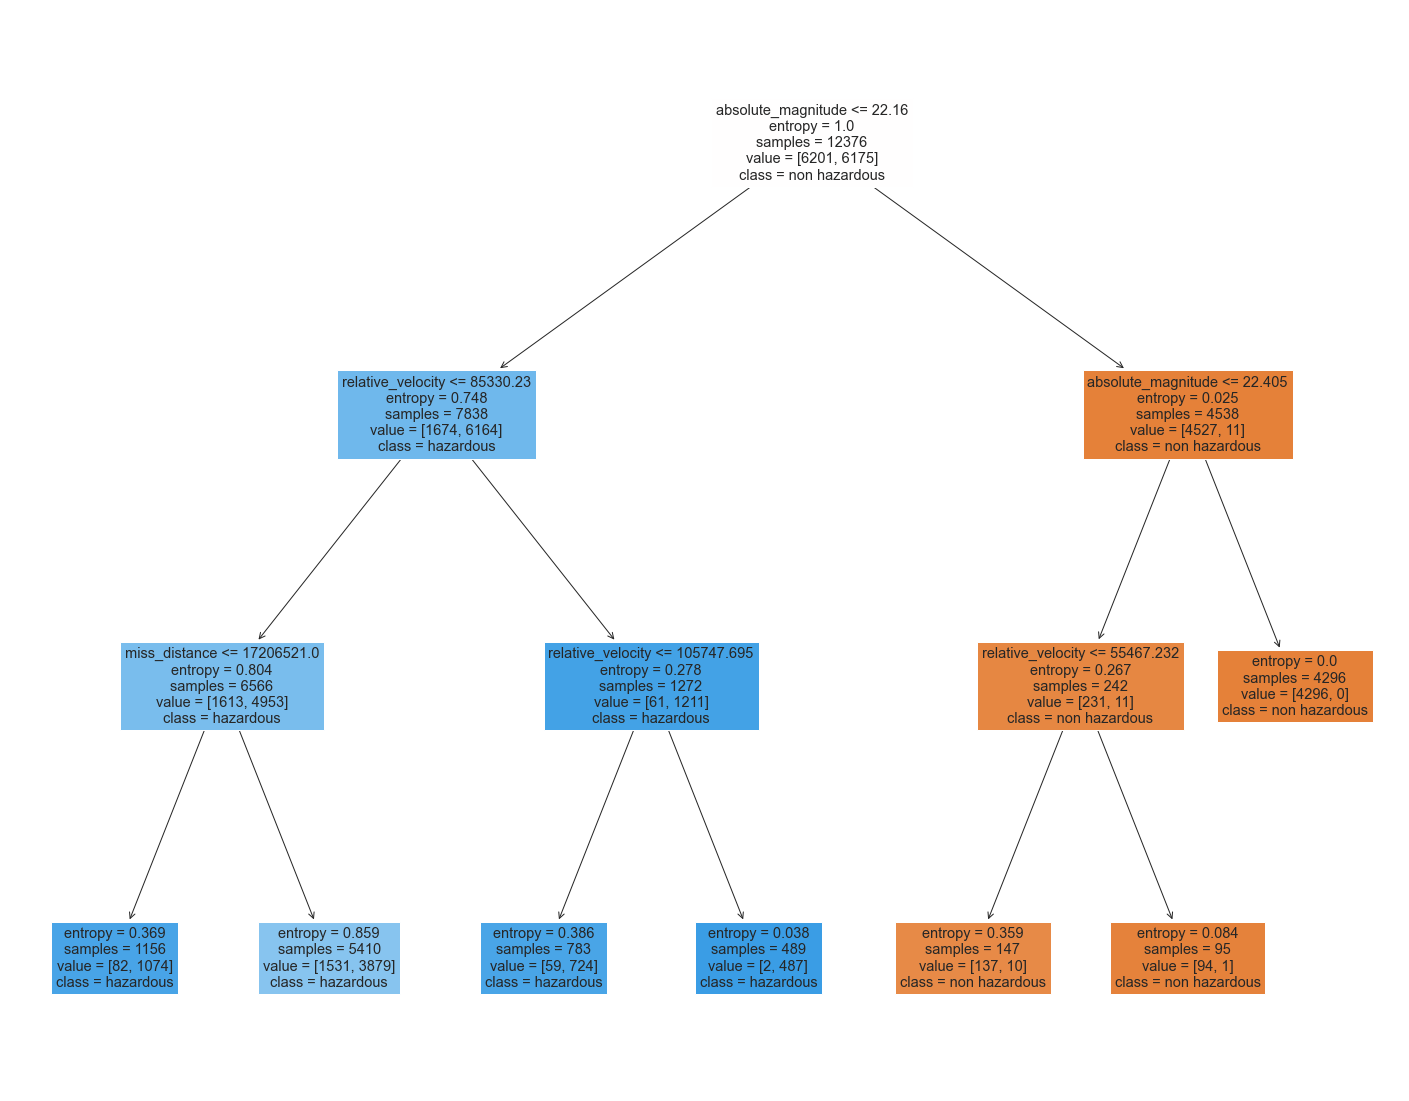

In [181]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arvore_entropy, feature_names=df.columns[:-1], class_names=['non hazardous', 'hazardous'], filled=True);

#### Normal Data

0.860105580693816

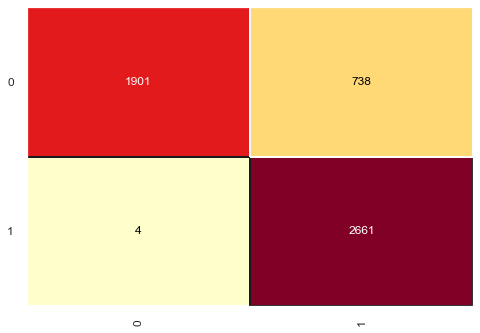

In [182]:
cm = ConfusionMatrix(arvore_entropy)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [183]:
classification_decision_entropy_balanced = (classification_report(y_test, previsoes))

In [184]:
print(classification_decision_entropy_balanced)

              precision    recall  f1-score   support

           0       1.00      0.72      0.84      2639
           1       0.78      1.00      0.88      2665

    accuracy                           0.86      5304
   macro avg       0.89      0.86      0.86      5304
weighted avg       0.89      0.86      0.86      5304



#### Result Using the Normal Data, here we have 86,01% Accuracy, here we can see that our accuracy is good and that the model really learned how to predict a dangerous asteroid.

In [185]:
score_tree_entropy_balanced = 0.860105580693816

#### Standard Scaler

0.860105580693816

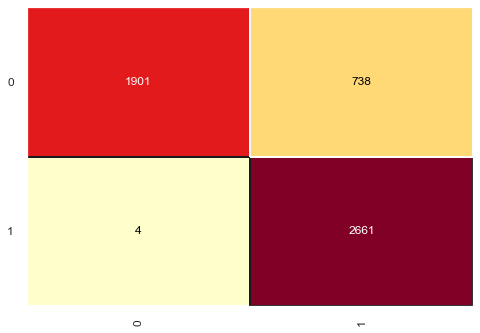

In [186]:
cm = ConfusionMatrix(arvore_entropy)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [187]:
classification_decision_entropy_balanced_standard = (classification_report(y_test, previsoes))

In [188]:
print(classification_decision_entropy_balanced_standard)

              precision    recall  f1-score   support

           0       1.00      0.72      0.84      2639
           1       0.78      1.00      0.88      2665

    accuracy                           0.86      5304
   macro avg       0.89      0.86      0.86      5304
weighted avg       0.89      0.86      0.86      5304



#### Here we can see when we use the StandardScaler our accuracy gets really worse, we have 65,90%, our accuracy is really bad and we can see that our model can't predict when the Asteroid is Dangerous.

In [189]:
score_tree_entropy_balanced_standard = 0.6595022624434389

#### MinMax Scaler 

0.860105580693816

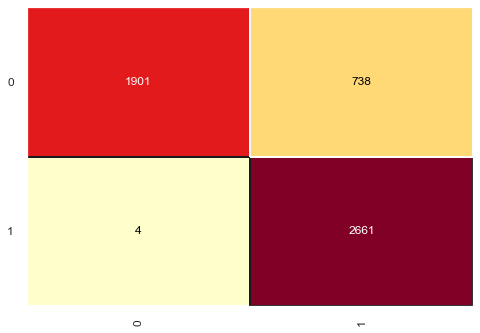

In [190]:
cm = ConfusionMatrix(arvore_entropy)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [191]:
classification_decision_entropy_balanced_minmax = (classification_report(y_test, previsoes))

In [192]:
print(classification_decision_entropy_balanced_minmax)

              precision    recall  f1-score   support

           0       1.00      0.72      0.84      2639
           1       0.78      1.00      0.88      2665

    accuracy                           0.86      5304
   macro avg       0.89      0.86      0.86      5304
weighted avg       0.89      0.86      0.86      5304



#### Here we can see when we use the MinMax Scaler our accuracy gets really worse, its worse than using Normal and StandardScaler Data, we have 64,83%, our accuracy is really bad and we can see that our model can't predict when the Asteroid is Dangerous.

In [193]:
score_tree_entropy_balanced_minmax = 0.6483785822021116

#### Checking the most important variables of the model

In [194]:
feature_imp = pd.Series(arvore_entropy.feature_importances_, index = columns).sort_values(ascending = False)

#### Seeing the most important variable using this model, we can see that it uses the variable "absolute_magnitude" to make a decision about be hazardous or don't be.

In [195]:
feature_imp

absolute_magnitude    0.931893
relative_velocity     0.038576
miss_distance         0.029531
est_diameter_max      0.000000
dtype: float64

#### Gini

In [196]:
arvore_gini = DecisionTreeClassifier(max_depth= 3, random_state=0)

In [197]:
arvore_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [198]:
previsoes = arvore_gini.predict(X_test)

#### Here we can see the decision rules.

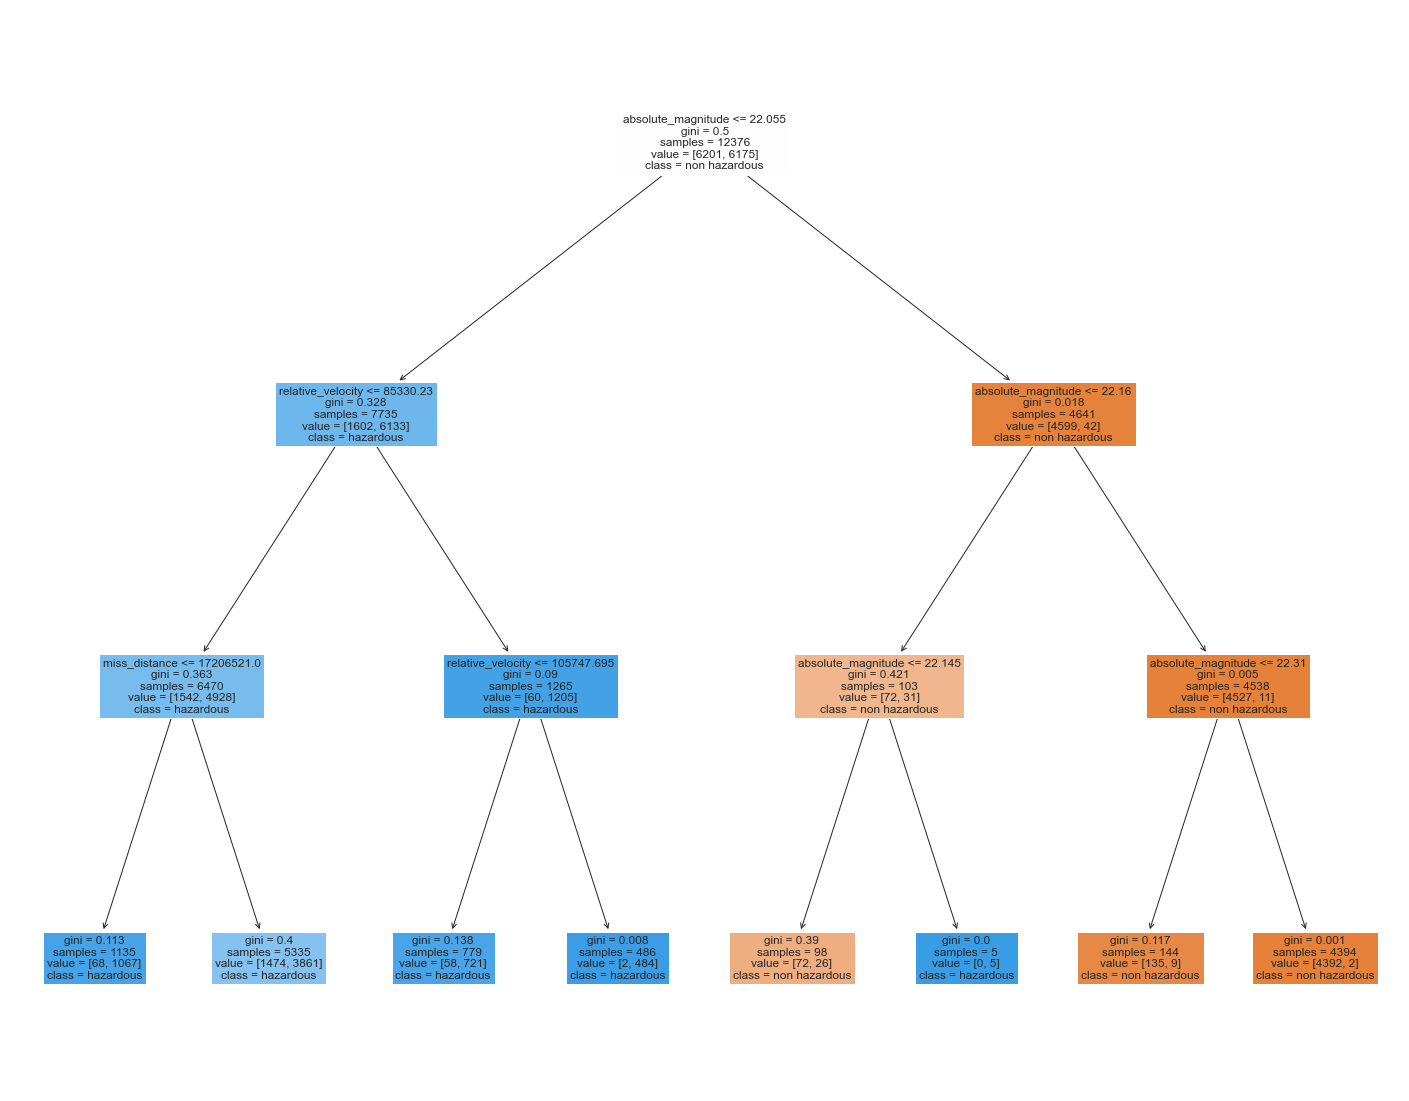

In [199]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arvore_gini, feature_names=df.columns[:-1], class_names=['non hazardous', 'hazardous'], filled=True);

#### Normal Data

0.8614253393665159

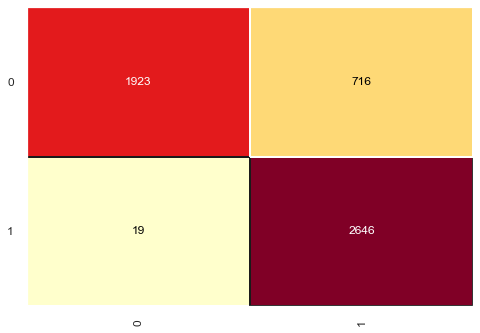

In [200]:
cm = ConfusionMatrix(arvore_gini)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [201]:
classification_decision_gini_balanced = (classification_report(y_test, previsoes))

In [202]:
print(classification_decision_gini_balanced)

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      2639
           1       0.79      0.99      0.88      2665

    accuracy                           0.86      5304
   macro avg       0.89      0.86      0.86      5304
weighted avg       0.89      0.86      0.86      5304



#### Result Using the Normal Data, here we have 86,14% Accuracy, here we can see that our accuracy is good and that the model is really good to preview dangerous asteroids, if we compare with the Entropy Model, this model is a little better.

In [203]:
score_tree_gini_balanced = 0.8614253393665159

#### StandardScaler

0.8614253393665159

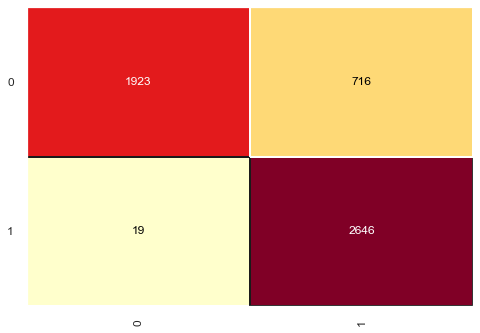

In [204]:
cm = ConfusionMatrix(arvore_gini)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [205]:
classification_decision_gini_scaler_balanced = (classification_report(y_test, previsoes))

In [206]:
print(classification_decision_gini_scaler_balanced)

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      2639
           1       0.79      0.99      0.88      2665

    accuracy                           0.86      5304
   macro avg       0.89      0.86      0.86      5304
weighted avg       0.89      0.86      0.86      5304



#### Here we can see when we use the StandardScaler our accuracy gets really worse, we have 66,30%, our accuracy is really bad and we can see that our model can't predict when the Asteroid is Dangerous.

In [207]:
score_tree_gini_scaler_balanced = 0.6630844645550528

#### MinMax Scaler

0.8614253393665159

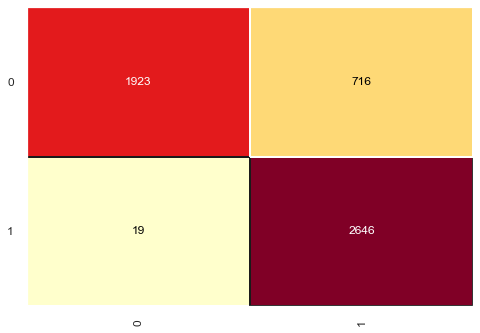

In [208]:
cm = ConfusionMatrix(arvore_gini)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [209]:
classification_decision_gini_minmax_balanced = (classification_report(y_test, previsoes))

In [210]:
print(classification_decision_gini_minmax_balanced)

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      2639
           1       0.79      0.99      0.88      2665

    accuracy                           0.86      5304
   macro avg       0.89      0.86      0.86      5304
weighted avg       0.89      0.86      0.86      5304



#### Here we can see when we use the MinMax Scaler our accuracy gets really worse, its worse than using Normal and StandardScaler Data, we have 65,08%, our accuracy is really bad and we can see that our model can't predict when the Asteroid is Dangerous.

In [211]:
score_tree_gini_minmax_balanced = 0.6508295625942685

##### Checking the most important variables of the model

In [212]:
feature_imp = pd.Series(arvore_gini.feature_importances_, index = columns).sort_values(ascending = False)

#### Seeing the most important variable using this model, we can see that it uses the variable "absolute_magnitude" to make a decision about be hazardous or don't be.

In [213]:
feature_imp

absolute_magnitude    0.955349
miss_distance         0.023331
relative_velocity     0.021320
est_diameter_max      0.000000
dtype: float64

### Random Forest

#### Entropy

In [214]:
random_forest = RandomForestClassifier(n_estimators = 100, max_depth= 3, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=0)

In [215]:
previsoes = random_forest.predict(X_test)

#### Normal Data

0.8618024132730016

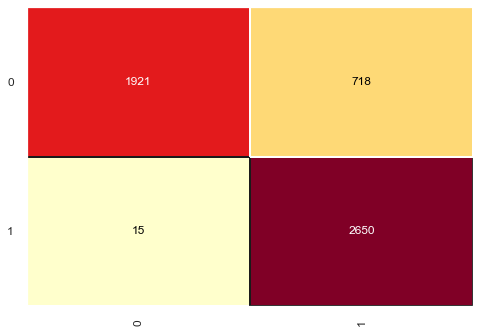

In [216]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [217]:
classification_random_entropy_balanced = (classification_report(y_test, previsoes))

In [218]:
print(classification_random_entropy_balanced)

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      2639
           1       0.79      0.99      0.88      2665

    accuracy                           0.86      5304
   macro avg       0.89      0.86      0.86      5304
weighted avg       0.89      0.86      0.86      5304



#### Result Using the Normal Data, here we have 86,16% Accuracy, here we can see that our accuracy is good and that the model is really good to preview dangerous asteroids.

In [219]:
score_random_entropy_balanced = 0.8618024132730016

#### Standard Scaler

0.8618024132730016

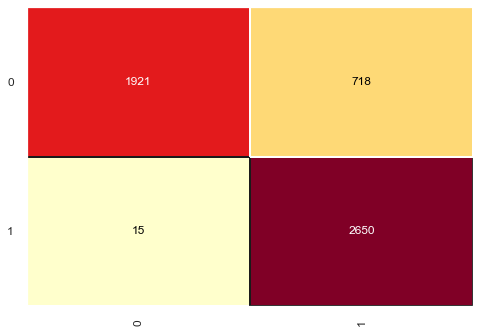

In [220]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [221]:
classification_random_entropy_balanced_standard = (classification_report(y_test, previsoes))

In [222]:
print(classification_random_entropy_balanced_standard)

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      2639
           1       0.79      0.99      0.88      2665

    accuracy                           0.86      5304
   macro avg       0.89      0.86      0.86      5304
weighted avg       0.89      0.86      0.86      5304



#### Here we can see when we use the StandardScaler our accuracy gets really worse, we have 67,45%, our accuracy is really bad and we can see that our model can't predict when the Asteroid is Dangerous.

In [223]:
score_random_entropy_balanced_scaler = 0.6745852187028658

#### MinMax Scaler

0.8618024132730016

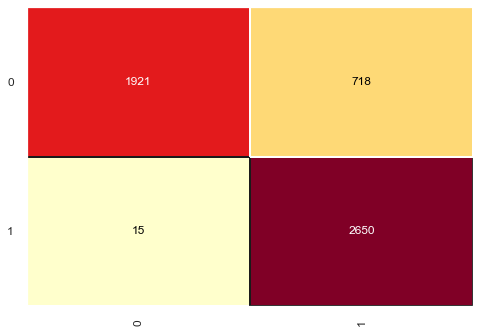

In [224]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [225]:
classification_random_entropy_balanced_minmax = (classification_report(y_test, previsoes))

In [226]:
print(classification_random_entropy_balanced_minmax)

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      2639
           1       0.79      0.99      0.88      2665

    accuracy                           0.86      5304
   macro avg       0.89      0.86      0.86      5304
weighted avg       0.89      0.86      0.86      5304



#### Here we can see when we use the MinMax Scaler our accuracy gets really worse, its worse than using Normal and StandardScaler Data, we have 65,38%, our accuracy is really bad and we can see that our model can't predict when the Asteroid is Dangerous.

In [227]:
score_random_entropy_balanced_minmax = 0.6538461538461539

#### Checking the most important variables of the model

In [228]:
feature_imp = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)

#### it's interesting to see this view, comparing with Decision Tree, here using Random Forest model we can see that we have two similar variables in importance value, both absolute_magnitude and est_diameter_max variables are important for the model.

In [229]:
feature_imp

absolute_magnitude    0.499676
est_diameter_max      0.433384
relative_velocity     0.047640
miss_distance         0.019300
dtype: float64

#### Gini

In [230]:
random_forest = RandomForestClassifier(n_estimators = 100, max_depth= 3, random_state = 0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [231]:
previsoes = random_forest.predict(X_test)

#### Normal Data

0.8614253393665159

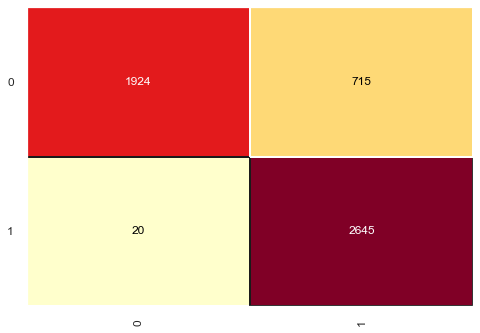

In [232]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [233]:
classification_random_gini_balanced = (classification_report(y_test, previsoes))

In [234]:
print(classification_random_gini_balanced)

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      2639
           1       0.79      0.99      0.88      2665

    accuracy                           0.86      5304
   macro avg       0.89      0.86      0.86      5304
weighted avg       0.89      0.86      0.86      5304



#### Result Using the Normal Data, here we have 86,14% Accuracy, here we can see that our accuracy is good and that the model is really good to preview dangerous asteroids, if we compare with the Entropy Model, this model is a little worse.

In [235]:
score_random_gini_balanced = 0.8614253393665159

#### Standard Scaler

0.8614253393665159

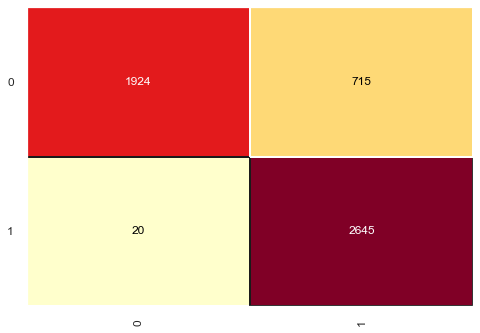

In [236]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [237]:
classification_random_gini_balanced_scaler = (classification_report(y_test, previsoes))

In [238]:
print(classification_random_gini_balanced_scaler)

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      2639
           1       0.79      0.99      0.88      2665

    accuracy                           0.86      5304
   macro avg       0.89      0.86      0.86      5304
weighted avg       0.89      0.86      0.86      5304



#### Here we can see when we use the StandardScaler our accuracy gets really worse, we have 67,77%, our accuracy is really bad and we can see that our model can't predict when the Asteroid is Dangerous.

In [239]:
score_random_gini_balanced_scaler = 0.677790346907994

#### MinMax Scaler

0.8614253393665159

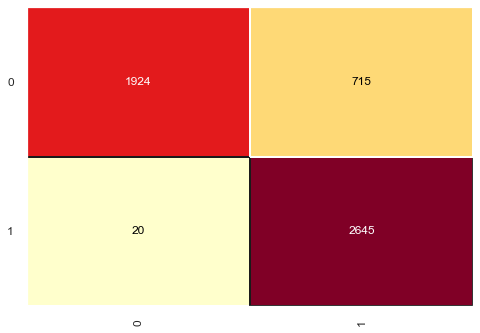

In [240]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [241]:
classification_random_gini_balanced_minmax = (classification_report(y_test, previsoes))

In [242]:
print(classification_random_gini_balanced_minmax)

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      2639
           1       0.79      0.99      0.88      2665

    accuracy                           0.86      5304
   macro avg       0.89      0.86      0.86      5304
weighted avg       0.89      0.86      0.86      5304



#### Here we can see when we use the MinMax Scaler our accuracy gets really worse, its worse than using Normal and StandardScaler Data, we have 65,17%, our accuracy is really bad and we can see that our model can't predict when the Asteroid is Dangerous.

In [243]:
score_random_gini_balanced_minmax = 0.6517722473604827

#### Checking the most important variables of the model

In [244]:
feature_imp = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)

#### Is the same thing when we compare with Entropy, both variables are important

In [245]:
feature_imp

absolute_magnitude    0.502948
est_diameter_max      0.437865
relative_velocity     0.044426
miss_distance         0.014761
dtype: float64

### KNN

In [246]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

In [247]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [248]:
previsoes = knn.predict(X_test)

#### Normal Data

0.5708898944193062

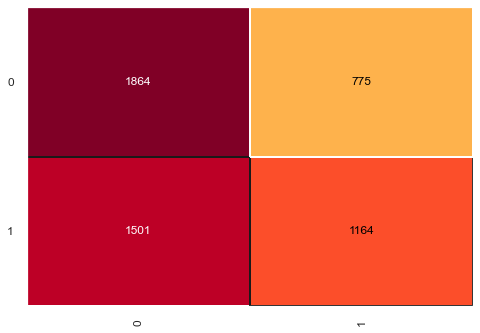

In [249]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [250]:
classification_knn_balanced = (classification_report(y_test, previsoes))

In [251]:
print(classification_knn_balanced)

              precision    recall  f1-score   support

           0       0.55      0.71      0.62      2639
           1       0.60      0.44      0.51      2665

    accuracy                           0.57      5304
   macro avg       0.58      0.57      0.56      5304
weighted avg       0.58      0.57      0.56      5304



#### Result Using the Normal Data, here we have 57,08% Accuracy, here we can see that our accuracy is really bad and we can see that our model our model is bad at predicting both outcomes.

In [252]:
score_knn_balanced = 0.5708898944193062

#### Standard Scaler

0.5708898944193062

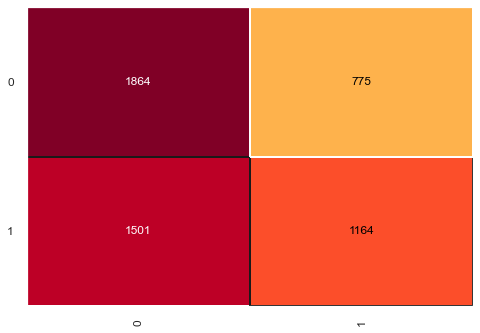

In [253]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [254]:
classification_knn_balanced_scaler = (classification_report(y_test, previsoes))

In [255]:
print(classification_knn_balanced_scaler)

              precision    recall  f1-score   support

           0       0.55      0.71      0.62      2639
           1       0.60      0.44      0.51      2665

    accuracy                           0.57      5304
   macro avg       0.58      0.57      0.56      5304
weighted avg       0.58      0.57      0.56      5304



#### Result Using the StandardScaler Data, here we have 59,16% Accuracy, here we can see that our accuracy is really bad and we can see that our model our model is bad at predicting both outcomes, when we compare with Normal Data, this model is a little better.

In [256]:
score_knn_balanced_scaler = 0.5916289592760181

#### MinMax Scaler

0.5708898944193062

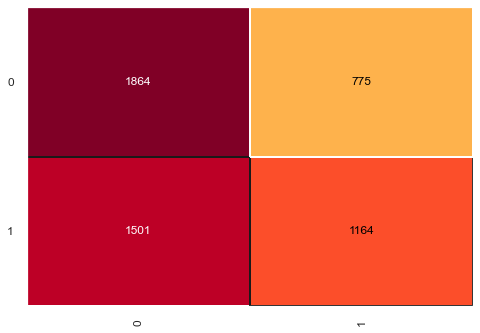

In [257]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [258]:
classification_knn_balanced_minmax = (classification_report(y_test, previsoes))

In [259]:
print(classification_knn_balanced_minmax)

              precision    recall  f1-score   support

           0       0.55      0.71      0.62      2639
           1       0.60      0.44      0.51      2665

    accuracy                           0.57      5304
   macro avg       0.58      0.57      0.56      5304
weighted avg       0.58      0.57      0.56      5304



#### Result Using the MinMax Scaler Data, here we have 57,69% Accuracy, here we can see that our accuracy is really bad and we can see that our model our model is bad at predicting both outcomes, when we compare with StandardScaler Data, this model is a little worse.

In [260]:
score_knn_balanced_minmax = 0.5769230769230769

### Logistic Regression

In [261]:
from sklearn.linear_model import LogisticRegression

In [262]:
logistic = LogisticRegression(random_state = 1)

In [263]:
logistic.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [264]:
previsoes = logistic.predict(X_test)

#### Normal Data

0.548265460030166

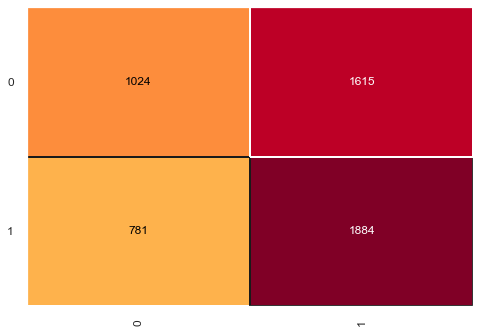

In [265]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [266]:
logistic_normal_balanced = print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.57      0.39      0.46      2639
           1       0.54      0.71      0.61      2665

    accuracy                           0.55      5304
   macro avg       0.55      0.55      0.54      5304
weighted avg       0.55      0.55      0.54      5304



#### Result Using the Normal Data, here we have 54,82% Accuracy, here we can see that our accuracy is really bad and we can see that our model our model is bad at predicting both outcomes.

In [267]:
logistic_balanced = 0.548265460030166

#### StandardScaler 

0.548265460030166

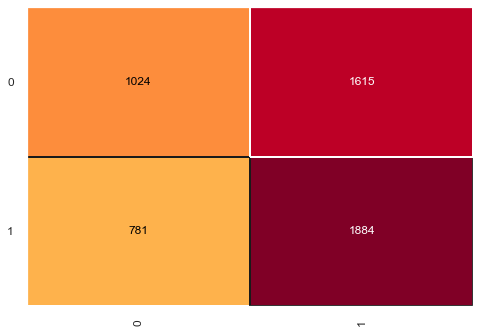

In [268]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [269]:
logistic_normal_balanced_standard = classification_report(y_test, previsoes)

In [270]:
print(logistic_normal_balanced_standard)

              precision    recall  f1-score   support

           0       0.57      0.39      0.46      2639
           1       0.54      0.71      0.61      2665

    accuracy                           0.55      5304
   macro avg       0.55      0.55      0.54      5304
weighted avg       0.55      0.55      0.54      5304



#### Result Using the StandardScaler Data, here we have 65,29% Accuracy, here we can see that our accuracy is really bad and we can see that our model our model is bad at predicting both outcomes, when we compare with Normal Data, this model is a little better.

In [271]:
logistic_balanced_scaler = 0.6529034690799397

#### MinMax Scaler

0.548265460030166

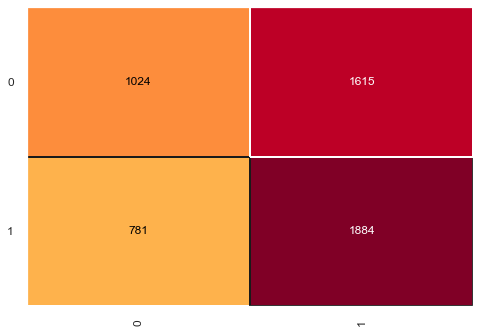

In [272]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [273]:
logistic_normal_balanced_minmax = classification_report(y_test, previsoes)

In [274]:
print(logistic_normal_balanced_minmax)

              precision    recall  f1-score   support

           0       0.57      0.39      0.46      2639
           1       0.54      0.71      0.61      2665

    accuracy                           0.55      5304
   macro avg       0.55      0.55      0.54      5304
weighted avg       0.55      0.55      0.54      5304



#### Result Using the MinMax Scaler Data, here we have 62,70% Accuracy, here we can see that our accuracy is really bad and we can see that our model our model is bad at predicting both outcomes, when we compare with Normal Data, this model is a little better.

In [275]:
logistic_balanced_minmax = 0.6270739064856712

### Checking the results

#### Here we are concatenating all the results to see what the best path we can take.

In [276]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

Naive_dict_v2 = {'Model':'Naive Bayes',
               'Scaling':'Standard',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian_scaler}

Naive_dict_v3 = {'Model':'Naive Bayes',
               'Scaling':'MinMax Scaler',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian_minmax}

In [277]:
resumo = pd.DataFrame({'Naive_dict_v1':pd.Series(Naive_dict_v1),
                       'Naive_dict_v2':pd.Series(Naive_dict_v2),
                       'Naive_dict_v3':pd.Series(Naive_dict_v3),
                      })

In [278]:
Decision_dict_v1 = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type':'Entropy',
               'Precision':score_tree_entropy}

Decision_dict_v2 = {'Model':'Decision Tree',
               'Scaling':'Standard',
               'Type':'Entropy',
               'Precision':score_tree_entropy_scaler}

Decision_dict_v3 = {'Model':'Decision Tree',
               'Scaling':'MinMax Scaler',
               'Type':'Entropy',
               'Precision':score_tree_entropy_minmax}

Decision_dict_v4 = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type':'Gini',
               'Precision':score_tree_gini}

Decision_dict_v5 = {'Model':'Decision Tree',
               'Scaling':'Standard',
               'Type':'Gini',
               'Precision':score_tree_gini_scaler}

Decision_dict_v6 = {'Model':'Decision Tree',
               'Scaling':'MinMax Scaler',
               'Type':'Gini',
               'Precision':score_tree_gini_minmax}

In [279]:
resumo_decision = pd.DataFrame({'Decision_dict_v1':pd.Series(Decision_dict_v1),
                       'Decision_dict_v2':pd.Series(Decision_dict_v2),
                       'Decision_dict_v3':pd.Series(Decision_dict_v3),
                       'Decision_dict_v4':pd.Series(Decision_dict_v4),
                       'Decision_dict_v5':pd.Series(Decision_dict_v5),
                       'Decision_dict_v6':pd.Series(Decision_dict_v6)
                      })

In [280]:
Random_dict_v1 = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type':'Entropy',
               'Precision':score_random_entropy}

Random_dict_v2 = {'Model':'Random Forest',
               'Scaling':'Standard',
               'Type':'Entropy',
               'Precision':score_random_entropy_scaler}

Random_dict_v3 = {'Model':'Random Forest',
               'Scaling':'MinMax Scaler',
               'Type':'Entropy',
               'Precision':score_random_entropy_minmax}

Random_dict_v4 = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type':'Gini',
               'Precision':score_random_gini}

Random_dict_v5 = {'Model':'Random Forest',
               'Scaling':'Standard',
               'Type':'Gini',
               'Precision':score_random_gini_scaler}

Random_dict_v6 = {'Model':'Random Forest',
               'Scaling':'MinMax Scaler',
               'Type':'Gini',
               'Precision':score_random_gini_scaler}

In [281]:
resumo_random = pd.DataFrame({'Random_dict_v1':pd.Series(Random_dict_v1),
                       'Random_dict_v2':pd.Series(Random_dict_v2),
                       'Random_dict_v3':pd.Series(Random_dict_v3),
                       'Random_dict_v4':pd.Series(Random_dict_v4),
                       'Random_dict_v5':pd.Series(Random_dict_v5),
                       'Random_dict_v6':pd.Series(Random_dict_v6)
                      })

In [282]:
KNN_dict_v1 = {'Model':'KNN',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':score_knn}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Standard',
               'Type':'-',
               'Precision':score_knn_scaler}

KNN_dict_v3 = {'Model':'KNN',
               'Scaling':'MinMax Scaler',
               'Type':'-',
               'Precision':score_knn_minmax}

In [283]:
resumo_knn = pd.DataFrame({'KNN_dict_v1':pd.Series(KNN_dict_v1),
                       'KNN_dict_v2':pd.Series(KNN_dict_v2),
                       'KNN_dict_v3':pd.Series(KNN_dict_v3)
                      })

In [284]:
Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_normal}

Logistic_dict_v2 = {'Model':'Logistic Regression',
               'Scaling':'Standard',
               'Type':'-',
               'Precision':logistic_standard}

Logistic_dict_v3 = {'Model':'Logistic Regression',
               'Scaling':'MinMax Scaler',
               'Type':'-',
               'Precision':logistic_minmax}

In [285]:
resumo_logistic = pd.DataFrame({'Logistic_dict_v1':pd.Series(Logistic_dict_v1),
                       'Logistic_dict_v2':pd.Series(Logistic_dict_v2),
                       'Logistic_dict_v3':pd.Series(Logistic_dict_v3)
                      })

In [286]:
Naive_dict_balanced_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian_balanced}

Naive_dict_balanced_v2 = {'Model':'Naive Bayes',
               'Scaling':'Standard',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian_balanced_standard}

Naive_dict_balanced_v3 = {'Model':'Naive Bayes',
               'Scaling':'MinMax Scaler',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian_balanced_minmax }

In [287]:
resumo_balanced = pd.DataFrame({'Naive_dict_v1':pd.Series(Naive_dict_balanced_v1),
                       'Naive_dict_v2':pd.Series(Naive_dict_balanced_v2),
                       'Naive_dict_v3':pd.Series(Naive_dict_balanced_v3),
                      })

In [288]:
Decision_dict_balanced_v1 = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type':'Entropy',
               'Precision':score_tree_entropy_balanced}

Decision_dict_balanced_v2 = {'Model':'Decision Tree',
               'Scaling':'Standard',
               'Type':'Entropy',
               'Precision':score_tree_entropy_balanced_standard}

Decision_dict_balanced_v3 = {'Model':'Decision Tree',
               'Scaling':'MinMax Scaler',
               'Type':'Entropy',
               'Precision':score_tree_entropy_balanced_minmax}

Decision_dict_balanced_v4 = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type':'Gini',
               'Precision':score_tree_gini_balanced}

Decision_dict_balanced_v5 = {'Model':'Decision Tree',
               'Scaling':'Standard',
               'Type':'Gini',
               'Precision':score_tree_gini_scaler_balanced}

Decision_dict_balanced_v6 = {'Model':'Decision Tree',
               'Scaling':'MinMax Scaler',
               'Type':'Gini',
               'Precision':score_tree_gini_minmax_balanced}

In [289]:
resumo_decision_balanced = pd.DataFrame({'Decision_dict_v1':pd.Series(Decision_dict_balanced_v1),
                       'Decision_dict_v2':pd.Series(Decision_dict_balanced_v2),
                       'Decision_dict_v3':pd.Series(Decision_dict_balanced_v3),
                       'Decision_dict_v4':pd.Series(Decision_dict_balanced_v4),
                       'Decision_dict_v5':pd.Series(Decision_dict_balanced_v5),
                       'Decision_dict_v6':pd.Series(Decision_dict_balanced_v6)
                      })

In [290]:
Random_dict_v1_balanced = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type':'Entropy',
               'Precision':score_random_entropy_balanced}

Random_dict_v2_balanced = {'Model':'Random Forest',
               'Scaling':'Standard',
               'Type':'Entropy',
               'Precision':score_random_entropy_balanced_scaler}

Random_dict_v3_balanced = {'Model':'Random Forest',
               'Scaling':'MinMax Scaler',
               'Type':'Entropy',
               'Precision':score_random_entropy_balanced_minmax}

Random_dict_v4_balanced = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type':'Gini',
               'Precision':score_random_gini_balanced}

Random_dict_v5_balanced = {'Model':'Random Forest',
               'Scaling':'Standard',
               'Type':'Gini',
               'Precision':score_random_gini_balanced_scaler}

Random_dict_v6_balanced = {'Model':'Random Forest',
               'Scaling':'MinMax Scaler',
               'Type':'Gini',
               'Precision':score_random_gini_balanced_minmax}

In [291]:
resumo_random_balanced = pd.DataFrame({'Random_dict_v1':pd.Series(Random_dict_v1_balanced),
                       'Random_dict_v2':pd.Series(Random_dict_v2_balanced),
                       'Random_dict_v3':pd.Series(Random_dict_v3_balanced),
                       'Random_dict_v4':pd.Series(Random_dict_v4_balanced),
                       'Random_dict_v5':pd.Series(Random_dict_v5_balanced),
                       'Random_dict_v6':pd.Series(Random_dict_v6_balanced)
                      })

In [292]:
KNN_dict_v1_balanced = {'Model':'KNN',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':score_knn_balanced}

KNN_dict_v2_balanced = {'Model':'KNN',
               'Scaling':'Standard',
               'Type':'-',
               'Precision':score_knn_balanced_scaler}

KNN_dict_v3_balanced = {'Model':'KNN',
               'Scaling':'MinMax Scaler',
               'Type':'-',
               'Precision':score_knn_balanced_minmax }

In [293]:
resumo_knn_balanced = pd.DataFrame({'KNN_dict_v1':pd.Series(KNN_dict_v1_balanced),
                       'KNN_dict_v2':pd.Series(KNN_dict_v2_balanced),
                       'KNN_dict_v3':pd.Series(KNN_dict_v3_balanced)
                      })

In [294]:
Logistic_dict_v1_balanced = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_balanced}

Logistic_dict_v2_balanced = {'Model':'Logistic Regression',
               'Scaling':'Standard',
               'Type':'-',
               'Precision':logistic_balanced_scaler}

Logistic_dict_v3_balanced = {'Model':'Logistic Regression',
               'Scaling':'MinMax Scaler',
               'Type':'-',
               'Precision':logistic_balanced_minmax}

In [295]:
resumo_logistic_balanced = pd.DataFrame({'Logistic_dict_v1':pd.Series(Logistic_dict_v1_balanced),
                       'Logistic_dict_v2':pd.Series(Logistic_dict_v2_balanced),
                       'Logistic_dict_v3':pd.Series(Logistic_dict_v3_balanced)
                      })

### Full Data

In [296]:
resumo

,Naive_dict_v1,Naive_dict_v2,Naive_dict_v3
Model,Naive Bayes,Naive Bayes,Naive Bayes
Scaling,Normal Data,Standard,MinMax Scaler
Type,Gaussian,Gaussian,Gaussian
Precision,0.897178,0.86195,0.86195


In [297]:
resumo_decision

,Decision_dict_v1,Decision_dict_v2,Decision_dict_v3,Decision_dict_v4,Decision_dict_v5,Decision_dict_v6
Model,Decision Tree,Decision Tree,Decision Tree,Decision Tree,Decision Tree,Decision Tree
Scaling,Normal Data,Standard,MinMax Scaler,Normal Data,Standard,MinMax Scaler
Type,Entropy,Entropy,Entropy,Gini,Gini,Gini
Precision,0.913067,0.913067,0.902499,0.913214,0.913214,0.913214


In [298]:
resumo_random

,Random_dict_v1,Random_dict_v2,Random_dict_v3,Random_dict_v4,Random_dict_v5,Random_dict_v6
Model,Random Forest,Random Forest,Random Forest,Random Forest,Random Forest,Random Forest
Scaling,Normal Data,Standard,MinMax Scaler,Normal Data,Standard,MinMax Scaler
Type,Entropy,Entropy,Entropy,Gini,Gini,Gini
Precision,0.913141,0.913141,0.913141,0.913251,0.913251,0.913251


In [299]:
resumo_knn

,KNN_dict_v1,KNN_dict_v2,KNN_dict_v3
Model,KNN,KNN,KNN
Scaling,Normal Data,Standard,MinMax Scaler
Type,-,-,-
Precision,0.879417,0.896334,0.89527


In [300]:
resumo_logistic

,Logistic_dict_v1,Logistic_dict_v2,Logistic_dict_v3
Model,Logistic Regression,Logistic Regression,Logistic Regression
Scaling,Normal Data,Standard,MinMax Scaler
Type,-,-,-
Precision,precision recall f1-score ...,0.901802,0.894096


### Balanced Classes

In [301]:
resumo_balanced

,Naive_dict_v1,Naive_dict_v2,Naive_dict_v3
Model,Naive Bayes,Naive Bayes,Naive Bayes
Scaling,Normal Data,Standard,MinMax Scaler
Type,Gaussian,Gaussian,Gaussian
Precision,0.616516,0.635935,0.609351


In [302]:
resumo_decision_balanced

,Decision_dict_v1,Decision_dict_v2,Decision_dict_v3,Decision_dict_v4,Decision_dict_v5,Decision_dict_v6
Model,Decision Tree,Decision Tree,Decision Tree,Decision Tree,Decision Tree,Decision Tree
Scaling,Normal Data,Standard,MinMax Scaler,Normal Data,Standard,MinMax Scaler
Type,Entropy,Entropy,Entropy,Gini,Gini,Gini
Precision,0.860106,0.659502,0.648379,0.861425,0.663084,0.65083


In [303]:
resumo_random_balanced

,Random_dict_v1,Random_dict_v2,Random_dict_v3,Random_dict_v4,Random_dict_v5,Random_dict_v6
Model,Random Forest,Random Forest,Random Forest,Random Forest,Random Forest,Random Forest
Scaling,Normal Data,Standard,MinMax Scaler,Normal Data,Standard,MinMax Scaler
Type,Entropy,Entropy,Entropy,Gini,Gini,Gini
Precision,0.861802,0.674585,0.653846,0.861425,0.67779,0.651772


In [304]:
resumo_knn_balanced

,KNN_dict_v1,KNN_dict_v2,KNN_dict_v3
Model,KNN,KNN,KNN
Scaling,Normal Data,Standard,MinMax Scaler
Type,-,-,-
Precision,0.57089,0.591629,0.576923


In [305]:
resumo_logistic_balanced

,Logistic_dict_v1,Logistic_dict_v2,Logistic_dict_v3
Model,Logistic Regression,Logistic Regression,Logistic Regression
Scaling,Normal Data,Standard,MinMax Scaler
Type,-,-,-
Precision,0.548265,0.652903,0.627074


## <font color='blue'> 4. Conclusion. </font>

#### In this project we can see that we have numerical variables and some categorical variales, in our Data Visualization we can get some good insights.

#### When we look at machine learning models, most of them have good accuracy, but the biggest problem when we use all our data is that the models only learn to predict non-hazardous asteroids, this shows us false accuracy, because our goal is to predict and see if the asteroid is dangerous, so it was necessary to balance our classes and run all the machine learning models again to check if the models start to predict when the asteroid is dangerous, which ended up working, after balancing the classes we managed to have better results.

#### Other interesting thing to see is the most important variables in the Decision Tree Model, We can see that the most important variable of model is absolute_magnitude and when we use Random Forest Model we have one more important variable that is est_diameter_max,which shows us that these are the variables that most explain when the asteroid is dangerous or not.

#### now looking at the models, as mentioned before, the models with all the data gives us a false sense of good result, so we cannot trust the accuracy of the result, we have to look at the results of the balanced classes, which gives us a better recall when predicting a dangerous asteroid, the two best models to use are the Decision Tree and Random Forest models using normal, non-scaling data.

#### Good Models to use:
##### - Random Forest (Balanced Classes - Entropy and Gini)
##### - Decision Tree (Balanced Classes - Entropy and Gini)

### Models with Good Precision but bad Recall:
##### - Naive Bayes
##### - Random Forest (Normal Data)
##### - Decision Tree (Normal Data)
##### - Logistic Regression

In [306]:
Random_dict_v1_balanced

{'Model': 'Random Forest',
 'Scaling': 'Normal Data',
 'Type': 'Entropy',
 'Precision': 0.8618024132730016}

In [307]:
print(classification_random_entropy_balanced)

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      2639
           1       0.79      0.99      0.88      2665

    accuracy                           0.86      5304
   macro avg       0.89      0.86      0.86      5304
weighted avg       0.89      0.86      0.86      5304



In [308]:
Random_dict_v4_balanced

{'Model': 'Random Forest',
 'Scaling': 'Normal Data',
 'Type': 'Gini',
 'Precision': 0.8614253393665159}

In [309]:
print(classification_random_gini_balanced)

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      2639
           1       0.79      0.99      0.88      2665

    accuracy                           0.86      5304
   macro avg       0.89      0.86      0.86      5304
weighted avg       0.89      0.86      0.86      5304



In [310]:
Decision_dict_balanced_v1

{'Model': 'Decision Tree',
 'Scaling': 'Normal Data',
 'Type': 'Entropy',
 'Precision': 0.860105580693816}

In [311]:
print(classification_decision_entropy_balanced)

              precision    recall  f1-score   support

           0       1.00      0.72      0.84      2639
           1       0.78      1.00      0.88      2665

    accuracy                           0.86      5304
   macro avg       0.89      0.86      0.86      5304
weighted avg       0.89      0.86      0.86      5304



In [312]:
Decision_dict_balanced_v4

{'Model': 'Decision Tree',
 'Scaling': 'Normal Data',
 'Type': 'Gini',
 'Precision': 0.8614253393665159}

In [313]:
print(classification_decision_gini_balanced)

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      2639
           1       0.79      0.99      0.88      2665

    accuracy                           0.86      5304
   macro avg       0.89      0.86      0.86      5304
weighted avg       0.89      0.86      0.86      5304

